In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
path = 'data1.txt'
data = pd.read_csv(path, header=None, names=['Population','Profit'])
data = (data - data.mean())/ data.std()
print(data.head())




   Population    Profit
0   -0.529654  2.132905
1   -0.680150  0.597261
2    0.092716  1.419690
3   -0.298872  1.091575
4   -0.594333  0.178606


In [2]:
def cost_function(x, y, theta):
    vec = np.power((np.dot(x,theta.T)-y),2)
    sum = np.sum(vec)/(2*x.shape[0])
    return sum

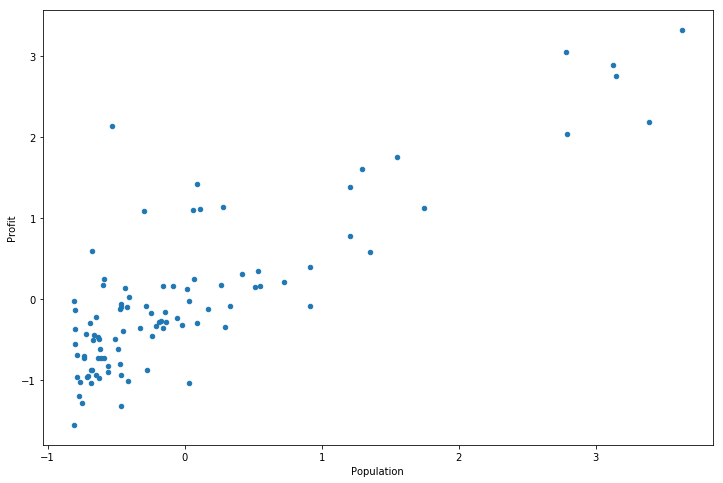

In [3]:
data.plot( kind='scatter',x='Population', y='Profit', figsize=(12,8))

In [4]:
data.insert(0, 'Ones', 1)


In [5]:
cols = data.shape[1] #no. of columns being denoted as the 1th element of the array
cols

3

In [6]:
x=data.iloc[:, 0:cols-1]


In [7]:
y = data.iloc[:,cols-1:cols]

In [8]:
x

,Ones,Population
0,1,-0.529654
1,1,-0.680150
2,1,0.092716
3,1,-0.298872
4,1,-0.594333
5,1,0.057650
6,1,-0.176594
7,1,0.108091
8,1,-0.432468
9,1,-0.802401


In [9]:
y.values

array([[ 2.13290482],
       [ 0.59726104],
       [ 1.41969013],
       [ 1.09157508],
       [ 0.17860583],
       [ 1.09738242],
       [-0.2705561 ],
       [ 1.11807109],
       [ 0.13784552],
       [-0.36704878],
       [-0.46947585],
       [ 1.75415697],
       [-0.48709752],
       [ 0.25165135],
       [-0.92971166],
       [-0.42216413],
       [-0.09697089],
       [-0.9579154 ],
       [-0.39695661],
       [-0.08163587],
       [-0.49009193],
       [ 2.89058201],
       [-0.2860363 ],
       [-0.11825845],
       [-0.50027293],
       [ 3.04865071],
       [ 1.39047192],
       [ 0.21914836],
       [ 1.60661408],
       [ 3.32250338],
       [-1.28108876],
       [ 0.02857667],
       [ 1.14238936],
       [-0.72403724],
       [ 0.12766451],
       [-0.23171947],
       [-0.31264121],
       [-0.44395982],
       [ 0.77634507],
       [-0.06201793],
       [-0.95867761],
       [-0.34982637],
       [-0.08234364],
       [-0.61676466],
       [ 0.16200045],
       [-0

In [10]:
theta = np.zeros((1,2))
theta

array([[ 0.,  0.]])

In [11]:
x.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [12]:
cost_function(x,y, theta)


Profit    0.494845
dtype: float64

In [30]:
def gradient_descent(x,y, theta, alpha, iterations):
    temp = theta.copy()
    #print(temp)
    #Scrape training data to exclude the ones.
    
    
    #initialise the cost array
    cost = np.zeros(iterations)
    
    for i in range(iterations):
        errorx =np.dot(x , theta.T) - y
        
        for j in range(x.shape[1]):
            x_t = x.iloc[:, j:j+1]
            temp[0,j] = theta[0,j] - (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_t.T))
            print ((1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_t.T)))
            
            
            
       # temp[0,0] = theta[0,0] - (1/x.shape[0])*alpha*np.sum(errorx)
        
        
        #print (theta[0,0])
        
       # temp[0,1] = theta[0,1] - (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_1.T))  
         
       # print ((1/x.shape[0])*alpha*np.sum(errorx), (1/x.shape[0])*alpha*np.sum(np.dot(errorx,x_1.T)))
        theta = temp.copy()
        print (theta)
        cost[i] = cost_function(x, y, theta)
        #print(cost[i])
        #temp = theta.copy()
        
        
        #print(temp)
    return theta, cost

In [31]:
theta = np.ones((1,2))
alpha =0.0001
iterations = 1000

final_theta, cost = gradient_descent(x, y, theta,alpha, iterations)

cost_function(x, y, final_theta)

0.0097
-5.93889198987e-18
[[ 0.9903  1.    ]]
0.00960591
-5.87296534429e-18
[[ 0.98069409  1.        ]]
0.009512732673
-5.81070129012e-18
[[ 0.97118136  1.        ]]
0.00942045916607
-5.76949713663e-18
[[ 0.9617609  1.       ]]
0.00932908071216
-5.70265484319e-18
[[ 0.95243182  1.        ]]
0.00923858862925
-5.66236633755e-18
[[ 0.94319323  1.        ]]
0.00914897431955
-5.59827098768e-18
[[ 0.93404425  1.        ]]
0.00906022926865
-5.47923676648e-18
[[ 0.92498403  1.        ]]
0.00897234504474
-5.45359862653e-18
[[ 0.91601168  1.        ]]
0.00888531329781
-5.46733334436e-18
[[ 0.90712637  1.        ]]
0.00879912575882
-5.41147882518e-18
[[ 0.89832724  1.        ]]
0.00871377423896
-5.33914264461e-18
[[ 0.88961347  1.        ]]
0.00862925062884
-5.28237247758e-18
[[ 0.88098422  1.        ]]
0.00854554689774
-5.22377101483e-18
[[ 0.87243867  1.        ]]
0.00846265509283
-5.16608519995e-18
[[ 0.86397601  1.        ]]
0.00838056733843
-5.13953141214e-18
[[ 0.85559545  1.        ]]
0.00

-1.49067470853e-18
[[ 0.24811293  1.        ]]
0.00240669545833
-1.45954268145e-18
[[ 0.24570624  1.        ]]
0.00238335051239
-1.45588009002e-18
[[ 0.24332289  1.        ]]
0.00236023201242
-1.41971199974e-18
[[ 0.24096266  1.        ]]
0.0023373377619
-1.43298889364e-18
[[ 0.23862532  1.        ]]
0.00231466558561
-1.42520588687e-18
[[ 0.23631065  1.        ]]
0.00229221332943
-1.37576090268e-18
[[ 0.23401844  1.        ]]
0.00226997886013
-1.37576090268e-18
[[ 0.23174846  1.        ]]
0.00224796006519
-1.37484525482e-18
[[ 0.2295005  1.       ]]
0.00222615485256
-1.35653229772e-18
[[ 0.22727435  1.        ]]
0.00220456115049
-1.34417105167e-18
[[ 0.22506978  1.        ]]
0.00218317690733
-1.35058058666e-18
[[ 0.22288661  1.        ]]
0.00216200009132
-1.32402679885e-18
[[ 0.22072461  1.        ]]
0.00214102869044
-1.31578596815e-18
[[ 0.21858358  1.        ]]
0.00212026071214
-1.27320834288e-18
[[ 0.21646332  1.        ]]
0.00209969418323
-1.27870223001e-18
[[ 0.21436362  1.       

[[ 0.0563897  1.       ]]
0.000546980134896
-3.27801932219e-19
[[ 0.05584272  1.        ]]
0.000541674427588
-3.45657065399e-19
[[ 0.05530105  1.        ]]
0.00053642018564
-3.34669291134e-19
[[ 0.05476463  1.        ]]
0.000531216909839
-3.08115503329e-19
[[ 0.05423341  1.        ]]
0.000526064105814
-3.2368151687e-19
[[ 0.05370735  1.        ]]
0.000520961283987
-3.39247530411e-19
[[ 0.05318639  1.        ]]
0.000515907959533
-3.10404622967e-19
[[ 0.05267048  1.        ]]
0.000510903652325
-2.94151873535e-19
[[ 0.05215958  1.        ]]
0.000505947886898
-3.04223999944e-19
[[ 0.05165363  1.        ]]
0.000501040192395
-3.11320270823e-19
[[ 0.05115259  1.        ]]
0.000496180102529
-3.25512812581e-19
[[ 0.05065641  1.        ]]
0.000491367155534
-2.92778401752e-19
[[ 0.05016504  1.        ]]
0.000486600894125
-2.92778401752e-19
[[ 0.04967844  1.        ]]
0.000481880865452
-2.87971250511e-19
[[ 0.04919656  1.        ]]
0.000477206621057
-3.06513119582e-19
[[ 0.04871935  1.        ]]
0

0.000135712846026
-7.95469074345e-20
[[ 0.0138553  1.       ]]
0.00013439643142
-9.27093453553e-20
[[ 0.01372091  1.        ]]
0.000133092786035
-9.36249932107e-20
[[ 0.01358781  1.        ]]
0.00013180178601
-8.79021941147e-20
[[ 0.01345601  1.        ]]
0.000130523308686
-7.47397561938e-20
[[ 0.01332549  1.        ]]
0.000129257232592
-8.00047313622e-20
[[ 0.01319623  1.        ]]
0.000128003437436
-7.24506365554e-20
[[ 0.01306823  1.        ]]
0.000126761804092
-7.15349887001e-20
[[ 0.01294147  1.        ]]
0.000125532214593
-7.43963882481e-20
[[ 0.01281593  1.        ]]
0.000124314552111
-7.51975801215e-20
[[ 0.01269162  1.        ]]
0.000123108700956
-8.04625552898e-20
[[ 0.01256851  1.        ]]
0.000121914546556
-8.53841625124e-20
[[ 0.0124466  1.       ]]
0.000120731975455
-8.10348351994e-20
[[ 0.01232586  1.        ]]
0.000119560875293
-6.79868532606e-20
[[ 0.0122063  1.       ]]
0.000118401134803
-6.77579412967e-20
[[ 0.0120879  1.       ]]
0.000117252643795
-7.56554040492e-2

3.14512431134e-05
-8.58419864401e-21
[[ 0.00321094  1.        ]]
3.11461660552e-05
-7.09627087905e-21
[[ 0.0031798  1.       ]]
3.08440482444e-05
-2.31201083479e-20
[[ 0.00314895  1.        ]]
3.05448609764e-05
-1.92286049626e-20
[[ 0.00311841  1.        ]]
3.0248575825e-05
1.35058058666e-20
[[ 0.00308816  1.        ]]
2.99551646395e-05
-1.7168397288e-20
[[ 0.00305821  1.        ]]
2.96645995425e-05
-2.42646681671e-20
[[ 0.00302854  1.        ]]
2.93768529269e-05
-3.13609390461e-20
[[ 0.00299916  1.        ]]
2.90918974535e-05
-2.01442528179e-20
[[ 0.00297007  1.        ]]
2.88097060482e-05
-1.87707810349e-20
[[ 0.00294126  1.        ]]
2.85302518996e-05
-1.27046139931e-20
[[ 0.00291273  1.        ]]
2.82535084561e-05
-2.33490203117e-20
[[ 0.00288448  1.        ]]
2.79794494241e-05
-1.7168397288e-20
[[ 0.0028565  1.       ]]
2.77080487647e-05
-4.69269525872e-21
[[ 0.00282879  1.        ]]
2.74392806917e-05
3.4336794576e-22
[[ 0.00280135  1.        ]]
2.7173119669e-05
-1.45359097039e-20

-4.12041534912e-21
[[  7.36913473e-04   1.00000000e+00]]
7.14806069095e-06
-8.12637471633e-21
[[  7.29765413e-04   1.00000000e+00]]
7.07872450224e-06
-1.7168397288e-21
[[  7.22686688e-04   1.00000000e+00]]
7.01006087457e-06
-1.55660135411e-20
[[  7.15676627e-04   1.00000000e+00]]
6.94206328409e-06
7.32518284289e-21
[[  7.08734564e-04   1.00000000e+00]]
6.87472527023e-06
-3.4336794576e-21
[[  7.01859839e-04   1.00000000e+00]]
6.80804043511e-06
6.98181489713e-21
[[  6.95051798e-04   1.00000000e+00]]
6.74200244289e-06
6.63844695137e-21
[[  6.88309796e-04   1.00000000e+00]]
6.67660501919e-06
-1.88852370168e-20
[[  6.81633191e-04   1.00000000e+00]]
6.61184195051e-06
-7.66855078865e-21
[[  6.75021349e-04   1.00000000e+00]]
6.54770708359e-06
-2.36923882575e-20
[[  6.68473642e-04   1.00000000e+00]]
6.48419432488e-06
-3.09031151184e-21
[[  6.61989447e-04   1.00000000e+00]]
6.42129763993e-06
-4.23487133104e-21
[[  6.55568150e-04   1.00000000e+00]]
6.35901105282e-06
2.36923882575e-20
[[  6.492091

-2.63248758416e-21
[[  1.74140504e-04   1.00000000e+00]]
1.68916288612e-06
2.40357562032e-21
[[  1.72451341e-04   1.00000000e+00]]
1.67277800612e-06
8.58419864401e-21
[[  1.70778563e-04   1.00000000e+00]]
1.65655205946e-06
-1.21323340835e-20
[[  1.69122011e-04   1.00000000e+00]]
1.64048350448e-06
-1.1445598192e-21
[[  1.67481527e-04   1.00000000e+00]]
1.62457081449e-06
6.18062302369e-21
[[  1.65856956e-04   1.00000000e+00]]
1.60881247759e-06
5.49388713217e-21
[[  1.64248144e-04   1.00000000e+00]]
1.59320699656e-06
-6.40953498753e-21
[[  1.62654937e-04   1.00000000e+00]]
1.57775288869e-06
5.26497516833e-21
[[  1.61077184e-04   1.00000000e+00]]
1.56244868567e-06
1.1445598192e-22
[[  1.59514735e-04   1.00000000e+00]]
1.54729293342e-06
-1.03010383728e-20
[[  1.57967442e-04   1.00000000e+00]]
1.53228419197e-06
2.51803160224e-21
[[  1.56435158e-04   1.00000000e+00]]
1.5174210353e-06
3.66259142144e-21
[[  1.54917737e-04   1.00000000e+00]]
1.50270205126e-06
-3.66259142144e-21
[[  1.53415035e-0

Profit    0.160455
dtype: float64

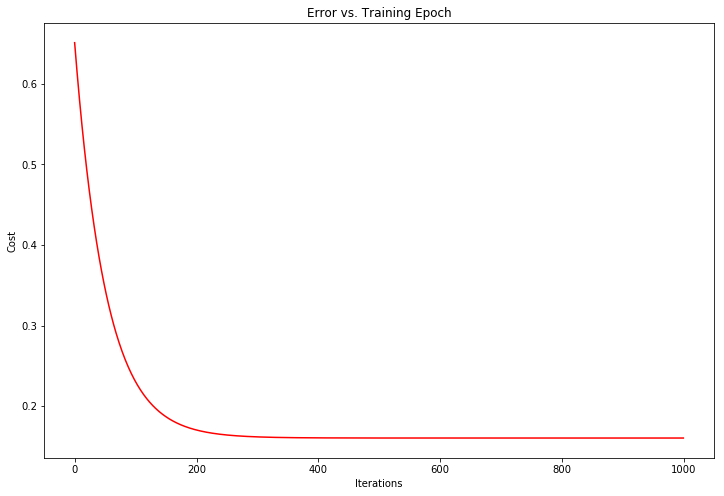

In [32]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), cost, 'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

[ -8.09500799e-01  -7.64668452e-01  -7.19836106e-01  -6.75003759e-01
  -6.30171413e-01  -5.85339066e-01  -5.40506720e-01  -4.95674373e-01
  -4.50842026e-01  -4.06009680e-01  -3.61177333e-01  -3.16344987e-01
  -2.71512640e-01  -2.26680293e-01  -1.81847947e-01  -1.37015600e-01
  -9.21832536e-02  -4.73509070e-02  -2.51856041e-03   4.23137862e-02
   8.71461328e-02   1.31978479e-01   1.76810826e-01   2.21643173e-01
   2.66475519e-01   3.11307866e-01   3.56140212e-01   4.00972559e-01
   4.45804906e-01   4.90637252e-01   5.35469599e-01   5.80301945e-01
   6.25134292e-01   6.69966638e-01   7.14798985e-01   7.59631332e-01
   8.04463678e-01   8.49296025e-01   8.94128371e-01   9.38960718e-01
   9.83793065e-01   1.02862541e+00   1.07345776e+00   1.11829010e+00
   1.16312245e+00   1.20795480e+00   1.25278714e+00   1.29761949e+00
   1.34245184e+00   1.38728418e+00   1.43211653e+00   1.47694888e+00
   1.52178122e+00   1.56661357e+00   1.61144592e+00   1.65627826e+00
   1.70111061e+00   1.74594296e+00

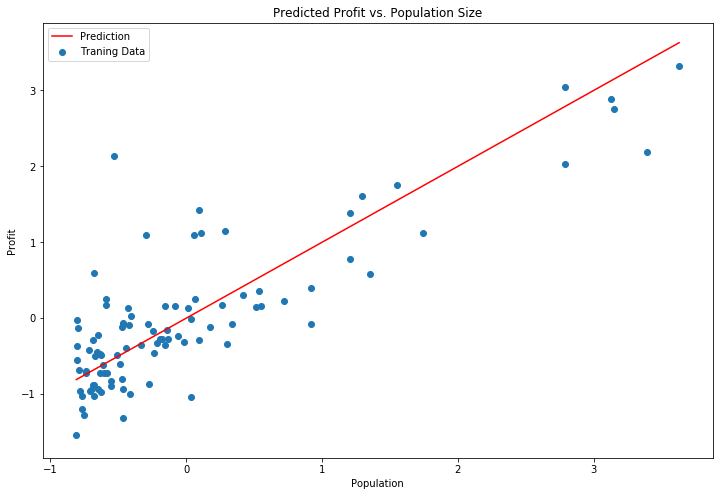

In [33]:
xdash = np.linspace(data.Population.min(), data.Population.max(), 100)
f = final_theta[0, 0] + (final_theta[0, 1] * xdash)
print(f)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(xdash, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Now, let us try to make this work for multiple variables.
Load data from a different file.

In [59]:
path2 = './data2.txt'
data2 = pd.read_csv(path2, header=None, names=['Size','Bedrooms','Prices'])
data2 = (data2 - data2.mean())/ data2.std()
print(data2.head())

       Size  Bedrooms    Prices
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


In [60]:
data2.insert(0, 'Ones', 1)

In [61]:
data2.head()

,Ones,Size,Bedrooms,Prices
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [62]:
cols = data2.shape[1]
x2 = data2.iloc[:, 0:cols-1]
y2 = data2.iloc[:, cols-1:cols]


In [63]:
theta2 = np.ones((1,3))

In [68]:
final2, cost2 =gradient_descent(x2,y2, theta2, alpha, 10000)

0.0047
1.24722927022e-19
1.23211133967e-18
[[ 0.9953  1.      1.    ]]
0.00467791
1.03935772518e-19
1.13289992045e-18
[[ 0.99062209  1.          1.        ]]
0.004655923823
1.28502409659e-19
1.15841142825e-18
[[ 0.98596617  1.          1.        ]]
0.00463404098103
1.19053703066e-19
1.1385691444e-18
[[ 0.98133213  1.          1.        ]]
0.00461226098842
1.0110116054e-19
1.1432934977e-18
[[ 0.97671986  1.          1.        ]]
0.00459058336178
9.21248892774e-20
1.17069474682e-18
[[ 0.97212928  1.          1.        ]]
0.00456900761998
7.55896527404e-20
1.18959216e-18
[[ 0.96756027  1.          1.        ]]
0.00454753328416
9.02351479589e-20
1.14045888572e-18
[[ 0.96301274  1.          1.        ]]
0.00452615987773
1.00628725211e-19
1.14518323902e-18
[[ 0.95848658  1.          1.        ]]
0.0045048869263
1.00628725211e-19
1.13573453243e-18
[[ 0.95398169  1.          1.        ]]
0.00448371395775
9.92114192218e-20
1.12628582583e-18
[[ 0.94949798  1.          1.        ]]
0.004462640502

[[ 0.57355158  1.          1.        ]]
0.0026956924242
9.07075832885e-20
6.84086357301e-19
[[ 0.57085589  1.          1.        ]]
0.0026830226698
3.87396970295e-20
6.51015884227e-19
[[ 0.56817286  1.          1.        ]]
0.00267041246326
7.51172174108e-20
6.17000540494e-19
[[ 0.56550245  1.          1.        ]]
0.00265786152468
5.85819808738e-20
6.93535063894e-19
[[ 0.56284459  1.          1.        ]]
0.00264536957551
8.03140060367e-20
7.00149158508e-19
[[ 0.56019922  1.          1.        ]]
0.00263293633851
6.42512048294e-20
6.16055669835e-19
[[ 0.55756628  1.          1.        ]]
0.00262056153772
7.65345233997e-20
5.88654420716e-19
[[ 0.55494572  1.          1.        ]]
0.00260824489849
7.13377347738e-20
6.66133814775e-19
[[ 0.55233748  1.          1.        ]]
0.00259598614747
3.49602143925e-20
6.57629978842e-19
[[ 0.54974149  1.          1.        ]]
0.00258378501257
6.89755581256e-20
6.6046459082e-19
[[ 0.54715771  1.          1.        ]]
0.00257164122302
8.03140060367e-2

0.00157553045331
4.8188403622e-20
4.13853348754e-19
[[ 0.33364371  1.          1.        ]]
0.00156812546018
1.60628012073e-20
4.00625159524e-19
[[ 0.33207559  1.          1.        ]]
0.00156075527052
5.29127569183e-20
4.00625159524e-19
[[ 0.33051483  1.          1.        ]]
0.00155341972075
4.39364856554e-20
3.9401106491e-19
[[ 0.32896141  1.          1.        ]]
0.00154611864806
2.69288137888e-20
3.45822661287e-19
[[ 0.3274153  1.         1.       ]]
0.00153885189041
8.97627126293e-21
3.75113651724e-19
[[ 0.32587644  1.          1.        ]]
0.00153161928653
3.6849955711e-20
4.09128995458e-19
[[ 0.32434482  1.          1.        ]]
0.00152442067588
6.14165928516e-21
3.59995721176e-19
[[ 0.3228204  1.         1.       ]]
0.00151725589871
2.4094201811e-20
3.27870118762e-19
[[ 0.32130315  1.          1.        ]]
0.00151012479598
7.65345233997e-20
3.50547014584e-19
[[ 0.31979302  1.          1.        ]]
0.00150302720944
4.62986623035e-20
3.4204317865e-19
[[ 0.31829  1.       1.     

0.000951711325402
4.25191796665e-21
2.45666371406e-19
[[ 0.20154006  1.          1.        ]]
0.000947238282172
4.84246212868e-20
1.93698485147e-19
[[ 0.20059282  1.          1.        ]]
0.000942786262246
2.76374667832e-20
1.9086387317e-19
[[ 0.19965004  1.          1.        ]]
0.000938355166813
1.44092775536e-20
2.64563784592e-19
[[ 0.19871168  1.          1.        ]]
0.000933944897529
2.4094201811e-20
2.16375380969e-19
[[ 0.19777774  1.          1.        ]]
0.000929555356511
2.4094201811e-20
2.31493311518e-19
[[ 0.19684818  1.          1.        ]]
0.000925186446335
2.36217664814e-20
2.49445854043e-19
[[ 0.19592299  1.          1.        ]]
0.000920838070038
1.51179305481e-20
2.32438182177e-19
[[ 0.19500216  1.          1.        ]]
0.000916510131108
1.86611955203e-20
1.95588226466e-19
[[ 0.19408565  1.          1.        ]]
0.000912202533492
3.54326497221e-20
2.48500983384e-19
[[ 0.19317344  1.          1.        ]]
0.000907915181585
1.79525425259e-20
1.96533097125e-19
[[ 0.1922

1.06297949166e-20
1.46454952185e-19
[[ 0.11237194  1.          1.        ]]
0.000528148129641
2.97634257665e-20
9.16524539478e-20
[[ 0.11184379  1.          1.        ]]
0.000525665833432
4.72435329628e-21
1.19998573725e-19
[[ 0.11131813  1.          1.        ]]
0.000523195204015
1.11022302463e-20
1.09604996474e-19
[[ 0.11079493  1.          1.        ]]
0.000520736186556
2.83461197777e-21
1.41730598888e-19
[[ 0.1102742  1.         1.       ]]
0.000518288726479
1.88974131851e-20
6.99204287849e-20
[[ 0.10975591  1.          1.        ]]
0.000515852769465
-5.66922395553e-21
8.78729713108e-20
[[ 0.10924006  1.          1.        ]]
0.000513428261448
1.58265835425e-20
1.45510081525e-19
[[ 0.10872663  1.          1.        ]]
0.000511015148619
1.32281892296e-20
1.28502409659e-19
[[ 0.10821561  1.          1.        ]]
0.000508613377421
-1.22833185703e-20
9.92114192218e-20
[[ 0.107707  1.        1.      ]]
0.000506222894547
7.08652994442e-21
1.60628012073e-19
[[ 0.10720078  1.          1.  

[[ 0.06177552  1.          1.        ]]
0.000290344940806
1.20471009055e-20
1.020460312e-19
[[ 0.06148517  1.          1.        ]]
0.000288980319584
-5.66922395553e-21
7.55896527404e-21
[[ 0.06119619  1.          1.        ]]
0.000287622112082
-2.83461197777e-21
2.83461197777e-20
[[ 0.06090857  1.          1.        ]]
0.000286270288155
9.44870659255e-22
2.17320251629e-20
[[ 0.0606223  1.         1.       ]]
0.000284924817801
-1.88974131851e-21
8.1258876696e-20
[[ 0.06033738  1.          1.        ]]
0.000283585671157
2.83461197777e-21
5.66922395553e-20
[[ 0.06005379  1.          1.        ]]
0.000282252818503
7.08652994442e-21
4.72435329628e-20
[[ 0.05977154  1.          1.        ]]
0.000280926230256
-2.48028548055e-20
6.80306874664e-20
[[ 0.05949061  1.          1.        ]]
0.000279605876973
4.72435329628e-21
9.54319365848e-20
[[ 0.05921101  1.          1.        ]]
0.000278291729352
-1.81887601907e-20
5.66922395553e-20
[[ 0.05893271  1.          1.        ]]
0.000276983758224
3.3

[[ 0.03364209  1.          1.        ]]
0.000158117809039
-4.72435329628e-22
6.14165928516e-20
[[ 0.03348397  1.          1.        ]]
0.000157374655336
8.26761826849e-21
3.02358610962e-20
[[ 0.03332659  1.          1.        ]]
0.000156634994456
1.15746655759e-20
3.77948263702e-20
[[ 0.03316996  1.          1.        ]]
0.000155898809982
8.5038359333e-21
3.77948263702e-20
[[ 0.03301406  1.          1.        ]]
0.000155166085575
1.7716324861e-20
9.44870659255e-22
[[ 0.03285889  1.          1.        ]]
0.000154436804973
-1.22833185703e-20
3.96845676887e-20
[[ 0.03270446  1.          1.        ]]
0.00015371095199
9.44870659255e-22
3.87396970295e-20
[[ 0.03255075  1.          1.        ]]
0.000152988510515
-3.30704730739e-21
1.51179305481e-20
[[ 0.03239776  1.          1.        ]]
0.000152269464516
8.26761826849e-21
2.36217664814e-20
[[ 0.03224549  1.          1.        ]]
0.000151553798033
2.36217664814e-20
7.55896527404e-21
[[ 0.03209394  1.          1.        ]]
0.000150841495182
-2

5.00781449405e-20
2.74012491184e-20
[[ 0.01984867  1.          1.        ]]
9.32887435103e-05
2.36217664814e-21
2.45666371406e-20
[[ 0.01975538  1.          1.        ]]
9.28502864158e-05
3.40153437332e-20
5.95268515331e-20
[[ 0.01966253  1.          1.        ]]
9.24138900696e-05
2.50390724703e-20
3.30704730739e-20
[[ 0.01957012  1.          1.        ]]
9.19795447863e-05
-2.50390724703e-20
3.40153437332e-20
[[ 0.01947814  1.          1.        ]]
9.15472409258e-05
6.61409461479e-21
3.21256024147e-20
[[ 0.01938659  1.          1.        ]]
9.11169688935e-05
9.68492425737e-21
2.83461197777e-20
[[ 0.01929547  1.          1.        ]]
9.06887191397e-05
9.21248892774e-21
1.13384479111e-20
[[ 0.01920478  1.          1.        ]]
9.02624821597e-05
5.43300629072e-21
3.6849955711e-20
[[ 0.01911452  1.          1.        ]]
8.98382484935e-05
0.0
-1.03935772518e-20
[[ 0.01902468  1.          1.        ]]
8.94160087256e-05
1.55903658777e-20
0.0
[[ 0.01893527  1.          1.        ]]
8.899575348

6.61409461479e-21
[[ 0.01171062  1.          1.        ]]
5.50399080195e-05
1.79525425259e-20
2.17320251629e-20
[[ 0.01165558  1.          1.        ]]
5.47812204518e-05
-9.44870659255e-22
-2.45666371406e-20
[[ 0.0116008  1.         1.       ]]
5.45237487156e-05
-1.88974131851e-21
5.85819808738e-20
[[ 0.01154627  1.          1.        ]]
5.42674870967e-05
-3.30704730739e-21
6.33063341701e-20
[[ 0.01149201  1.          1.        ]]
5.40124299073e-05
-5.66922395553e-21
3.49602143925e-20
[[ 0.01143799  1.          1.        ]]
5.37585714868e-05
5.43300629072e-21
-2.64563784592e-20
[[ 0.01138424  1.          1.        ]]
5.35059062008e-05
4.72435329628e-21
2.64563784592e-20
[[ 0.01133073  1.          1.        ]]
5.32544284416e-05
1.18108832407e-21
-1.13384479111e-20
[[ 0.01127748  1.          1.        ]]
5.3004132628e-05
1.88974131851e-21
3.21256024147e-20
[[ 0.01122447  1.          1.        ]]
5.27550132046e-05
-1.84249778555e-20
-5.66922395553e-21
[[ 0.01117172  1.          1.        

3.51809923994e-05
-2.55115077999e-20
-3.77948263702e-21
[[ 0.00745014  1.          1.        ]]
3.50156417351e-05
2.83461197777e-21
3.49602143925e-20
[[ 0.00741512  1.          1.        ]]
3.4851068219e-05
6.8503122796e-21
4.72435329628e-21
[[ 0.00738027  1.          1.        ]]
3.46872681983e-05
8.97627126293e-21
2.92909904369e-20
[[ 0.00734558  1.          1.        ]]
3.45242380378e-05
1.74801071962e-20
0.0
[[ 0.00731106  1.          1.        ]]
3.4361974119e-05
2.36217664814e-21
2.83461197777e-20
[[ 0.0072767  1.         1.       ]]
3.42004728407e-05
3.07082964258e-21
6.61409461479e-21
[[ 0.0072425  1.         1.       ]]
3.40397306183e-05
-5.90544162035e-21
-1.51179305481e-20
[[ 0.00720846  1.          1.        ]]
3.38797438844e-05
-4.72435329628e-22
1.79525425259e-20
[[ 0.00717458  1.          1.        ]]
3.37205090882e-05
-2.00785015092e-20
-5.10230155998e-20
[[ 0.00714086  1.          1.        ]]
3.35620226954e-05
9.44870659255e-22
-4.72435329628e-21
[[ 0.00710729  1.    

2.00832766285e-05
-3.30704730739e-21
3.11807317554e-20
[[ 0.00425295  1.          1.        ]]
1.99888852283e-05
-6.8503122796e-21
-3.87396970295e-20
[[ 0.00423297  1.          1.        ]]
1.98949374677e-05
2.48028548055e-20
3.87396970295e-20
[[ 0.00421307  1.          1.        ]]
1.98014312616e-05
0.0
-2.07871545036e-20
[[ 0.00419327  1.          1.        ]]
1.97083645347e-05
-1.18108832407e-20
-9.44870659255e-22
[[ 0.00417356  1.          1.        ]]
1.96157352214e-05
3.30704730739e-21
-1.60628012073e-20
[[ 0.00415394  1.          1.        ]]
1.95235412659e-05
-6.61409461479e-21
2.92909904369e-20
[[ 0.00413442  1.          1.        ]]
1.94317806219e-05
-2.14958074981e-20
-4.25191796665e-20
[[ 0.00411499  1.          1.        ]]
1.9340451253e-05
-1.58265835425e-20
-7.55896527404e-21
[[ 0.00409565  1.          1.        ]]
1.92495511321e-05
1.60628012073e-20
4.15743090072e-20
[[ 0.0040764  1.         1.       ]]
1.91590782418e-05
2.6692596124e-20
-4.72435329628e-20
[[ 0.00405724

1.15731890225e-05
-3.11807317554e-20
2.64563784592e-20
[[ 0.00245081  1.          1.        ]]
1.15187950341e-05
2.24406781573e-20
9.44870659255e-21
[[ 0.00243929  1.          1.        ]]
1.14646566975e-05
7.08652994442e-21
-6.61409461479e-21
[[ 0.00242782  1.          1.        ]]
1.1410772811e-05
-3.02358610962e-20
-2.36217664814e-20
[[ 0.00241641  1.          1.        ]]
1.13571421788e-05
2.6692596124e-20
1.41730598888e-20
[[ 0.00240506  1.          1.        ]]
1.13037636105e-05
3.54326497221e-20
7.55896527404e-21
[[ 0.00239375  1.          1.        ]]
1.12506359216e-05
-2.59839431295e-21
3.77948263702e-21
[[ 0.0023825  1.         1.       ]]
1.11977579327e-05
-2.29131134869e-20
1.22833185703e-20
[[ 0.0023713  1.         1.       ]]
1.11451284705e-05
1.22833185703e-20
-2.83461197777e-21
[[ 0.00236016  1.          1.        ]]
1.10927463667e-05
-5.1967886259e-21
-4.53537916443e-20
[[ 0.00234907  1.          1.        ]]
1.10406104587e-05
1.6535236537e-21
1.41730598888e-20
[[ 0.00

6.45282000451e-06
4.72435329628e-22
4.72435329628e-20
[[ 0.00136649  1.          1.        ]]
6.42249175049e-06
-1.53541482129e-20
-1.22833185703e-20
[[ 0.00136007  1.          1.        ]]
6.39230603927e-06
-6.14165928516e-21
1.32281892296e-20
[[ 0.00135367  1.          1.        ]]
6.36226220088e-06
-4.01570030184e-21
1.88974131851e-21
[[ 0.00134731  1.          1.        ]]
6.33235956854e-06
1.88974131851e-21
2.55115077999e-20
[[ 0.00134098  1.          1.        ]]
6.30259747856e-06
8.74005359811e-21
2.92909904369e-20
[[ 0.00133468  1.          1.        ]]
6.27297527042e-06
1.41730598888e-21
1.70076718666e-20
[[ 0.0013284  1.         1.       ]]
6.24349228664e-06
1.7716324861e-20
2.36217664814e-20
[[ 0.00132216  1.          1.        ]]
6.2141478729e-06
-3.30704730739e-21
2.64563784592e-20
[[ 0.00131594  1.          1.        ]]
6.18494137789e-06
-2.12595898332e-20
-2.74012491184e-20
[[ 0.00130976  1.          1.        ]]
6.15587215342e-06
1.6535236537e-21
-9.44870659255e-22
[[ 0

4.28299833009e-06
2.12595898332e-20
1.88974131851e-21
[[  9.06993242e-04   1.00000000e+00   1.00000000e+00]]
4.26286823794e-06
7.32274760923e-21
-1.32281892296e-20
[[  9.02730374e-04   1.00000000e+00   1.00000000e+00]]
4.24283275722e-06
-1.93698485147e-20
-3.49602143925e-20
[[  8.98487541e-04   1.00000000e+00   1.00000000e+00]]
4.22289144326e-06
5.90544162035e-21
5.66922395553e-21
[[  8.94264650e-04   1.00000000e+00   1.00000000e+00]]
4.20304385348e-06
1.29919715648e-20
1.51179305481e-20
[[  8.90061606e-04   1.00000000e+00   1.00000000e+00]]
4.18328954737e-06
1.20471009055e-20
-3.87396970295e-20
[[  8.85878316e-04   1.00000000e+00   1.00000000e+00]]
4.1636280865e-06
1.18108832407e-21
-3.77948263702e-20
[[  8.81714688e-04   1.00000000e+00   1.00000000e+00]]
4.14405903449e-06
-2.38579841462e-20
-2.07871545036e-20
[[  8.77570629e-04   1.00000000e+00   1.00000000e+00]]
4.12458195703e-06
-3.07082964258e-21
7.55896527404e-21
[[  8.73446047e-04   1.00000000e+00   1.00000000e+00]]
4.1051964218

2.86971158497e-06
-1.32281892296e-20
-1.13384479111e-20
[[  6.07707221e-04   1.00000000e+00   1.00000000e+00]]
2.85622394052e-06
1.18108832407e-20
2.55115077999e-20
[[  6.04850997e-04   1.00000000e+00   1.00000000e+00]]
2.842799688e-06
4.01570030184e-21
-1.98422838444e-20
[[  6.02008198e-04   1.00000000e+00   1.00000000e+00]]
2.82943852947e-06
5.66922395553e-21
-1.60628012073e-20
[[  5.99178759e-04   1.00000000e+00   1.00000000e+00]]
2.81614016838e-06
-2.45666371406e-20
-4.34640503258e-20
[[  5.96362619e-04   1.00000000e+00   1.00000000e+00]]
2.80290430959e-06
4.48813563146e-21
-3.77948263702e-20
[[  5.93559715e-04   1.00000000e+00   1.00000000e+00]]
2.78973065933e-06
-3.14169494202e-20
9.44870659255e-22
[[  5.90769984e-04   1.00000000e+00   1.00000000e+00]]
2.77661892524e-06
-6.37787694997e-21
5.48024982368e-20
[[  5.87993365e-04   1.00000000e+00   1.00000000e+00]]
2.76356881629e-06
3.18893847499e-20
-3.11807317554e-20
[[  5.85229796e-04   1.00000000e+00   1.00000000e+00]]
2.750580042

1.91373853074e-06
-4.96057096109e-21
-1.03935772518e-20
[[  4.05264672e-04   1.00000000e+00   1.00000000e+00]]
1.90474395965e-06
1.84249778555e-20
-2.26768958221e-20
[[  4.03359928e-04   1.00000000e+00   1.00000000e+00]]
1.89579166304e-06
2.99996434314e-20
-1.98422838444e-20
[[  4.01464137e-04   1.00000000e+00   1.00000000e+00]]
1.88688144222e-06
2.76374667832e-20
-1.13384479111e-20
[[  3.99577255e-04   1.00000000e+00   1.00000000e+00]]
1.87801309944e-06
-4.72435329628e-21
1.79525425259e-20
[[  3.97699242e-04   1.00000000e+00   1.00000000e+00]]
1.86918643787e-06
2.92909904369e-20
-7.55896527404e-21
[[  3.95830056e-04   1.00000000e+00   1.00000000e+00]]
1.86040126162e-06
1.62990188722e-20
1.51179305481e-20
[[  3.93969654e-04   1.00000000e+00   1.00000000e+00]]
1.85165737569e-06
-4.48813563146e-21
-2.83461197777e-20
[[  3.92117997e-04   1.00000000e+00   1.00000000e+00]]
1.84295458602e-06
9.92114192218e-21
2.55115077999e-20
[[  3.90275042e-04   1.00000000e+00   1.00000000e+00]]
1.83429269

1.30050173112e-06
-3.07082964258e-21
-4.72435329628e-21
[[  2.75401994e-04   1.00000000e+00   1.00000000e+00]]
1.29438937298e-06
-8.26761826849e-21
-1.60628012073e-20
[[  2.74107605e-04   1.00000000e+00   1.00000000e+00]]
1.28830574293e-06
-2.33855488166e-20
-1.22833185703e-20
[[  2.72819299e-04   1.00000000e+00   1.00000000e+00]]
1.28225070593e-06
1.11022302463e-20
-2.83461197777e-21
[[  2.71537048e-04   1.00000000e+00   1.00000000e+00]]
1.27622412762e-06
-8.26761826849e-21
9.44870659255e-21
[[  2.70260824e-04   1.00000000e+00   1.00000000e+00]]
1.27022587422e-06
2.48028548055e-20
-2.55115077999e-20
[[  2.68990598e-04   1.00000000e+00   1.00000000e+00]]
1.26425581261e-06
-1.86611955203e-20
-7.55896527404e-21
[[  2.67726343e-04   1.00000000e+00   1.00000000e+00]]
1.25831381029e-06
-2.59839431295e-21
-5.00781449405e-20
[[  2.66468029e-04   1.00000000e+00   1.00000000e+00]]
1.25239973538e-06
6.8503122796e-21
-1.13384479111e-20
[[  2.65215629e-04   1.00000000e+00   1.00000000e+00]]
1.2465

-1.79525425259e-20
1.13384479111e-20
[[  1.84525940e-04   1.00000000e+00   1.00000000e+00]]
8.67271918601e-07
1.48817128833e-20
-1.03935772518e-20
[[  1.83658668e-04   1.00000000e+00   1.00000000e+00]]
8.63195740583e-07
1.6535236537e-21
0.0
[[  1.82795472e-04   1.00000000e+00   1.00000000e+00]]
8.59138720602e-07
-4.72435329628e-22
1.13384479111e-20
[[  1.81936334e-04   1.00000000e+00   1.00000000e+00]]
8.55100768616e-07
9.44870659255e-21
7.55896527404e-21
[[  1.81081233e-04   1.00000000e+00   1.00000000e+00]]
8.51081795003e-07
-8.26761826849e-21
-2.07871545036e-20
[[  1.80230151e-04   1.00000000e+00   1.00000000e+00]]
8.47081710567e-07
-1.18108832407e-21
2.17320251629e-20
[[  1.79383069e-04   1.00000000e+00   1.00000000e+00]]
8.43100426527e-07
1.91336308499e-20
-1.88974131851e-21
[[  1.78539969e-04   1.00000000e+00   1.00000000e+00]]
8.39137854523e-07
-1.06297949166e-20
1.60628012073e-20
[[  1.77700831e-04   1.00000000e+00   1.00000000e+00]]
8.35193906607e-07
-4.96057096109e-21
-4.7243

5.78361845123e-07
3.07082964258e-20
-1.98422838444e-20
[[  1.22477350e-04   1.00000000e+00   1.00000000e+00]]
5.75643544451e-07
7.08652994442e-22
6.61409461479e-21
[[  1.21901706e-04   1.00000000e+00   1.00000000e+00]]
5.72938019792e-07
1.18108832407e-21
-6.61409461479e-21
[[  1.21328768e-04   1.00000000e+00   1.00000000e+00]]
5.70245211099e-07
-1.93698485147e-20
1.88974131851e-20
[[  1.20758523e-04   1.00000000e+00   1.00000000e+00]]
5.67565058607e-07
-1.03935772518e-20
2.74012491184e-20
[[  1.20190958e-04   1.00000000e+00   1.00000000e+00]]
5.64897502832e-07
5.66922395553e-21
3.49602143925e-20
[[  1.19626061e-04   1.00000000e+00   1.00000000e+00]]
5.62242484568e-07
4.72435329628e-21
4.0629438348e-20
[[  1.19063818e-04   1.00000000e+00   1.00000000e+00]]
5.59599944891e-07
-8.26761826849e-21
1.51179305481e-20
[[  1.18504218e-04   1.00000000e+00   1.00000000e+00]]
5.5696982515e-07
1.58265835425e-20
8.5038359333e-21
[[  1.17947248e-04   1.00000000e+00   1.00000000e+00]]
5.54352066971e-07

[[  8.44154815e-05   1.00000000e+00   1.00000000e+00]]
3.96752763217e-07
-2.74012491184e-20
-3.40153437332e-20
[[  8.40187288e-05   1.00000000e+00   1.00000000e+00]]
3.94888025231e-07
7.55896527404e-21
5.66922395553e-21
[[  8.36238407e-05   1.00000000e+00   1.00000000e+00]]
3.93032051511e-07
-8.03140060367e-21
-2.64563784592e-20
[[  8.32308087e-05   1.00000000e+00   1.00000000e+00]]
3.9118480087e-07
-9.44870659255e-22
-2.74012491184e-20
[[  8.28396239e-05   1.00000000e+00   1.00000000e+00]]
3.89346232305e-07
-1.29919715648e-20
1.79525425259e-20
[[  8.24502777e-05   1.00000000e+00   1.00000000e+00]]
3.87516305014e-07
-1.27557538999e-20
-3.59050850517e-20
[[  8.20627614e-05   1.00000000e+00   1.00000000e+00]]
3.8569497838e-07
-8.03140060367e-21
4.72435329628e-21
[[  8.16770664e-05   1.00000000e+00   1.00000000e+00]]
3.83882211982e-07
9.92114192218e-21
-5.00781449405e-20
[[  8.12931842e-05   1.00000000e+00   1.00000000e+00]]
3.82077965585e-07
3.54326497221e-20
-1.79525425259e-20
[[  8.091

-1.60628012073e-20
[[  5.65603969e-05   1.00000000e+00   1.00000000e+00]]
2.65833865256e-07
6.61409461479e-21
-9.44870659255e-22
[[  5.62945630e-05   1.00000000e+00   1.00000000e+00]]
2.64584446089e-07
-4.25191796665e-21
3.77948263702e-20
[[  5.60299786e-05   1.00000000e+00   1.00000000e+00]]
2.63340899193e-07
3.14169494202e-20
-2.92909904369e-20
[[  5.57666377e-05   1.00000000e+00   1.00000000e+00]]
2.62103196967e-07
4.01570030184e-21
-4.8188403622e-20
[[  5.55045345e-05   1.00000000e+00   1.00000000e+00]]
2.60871311941e-07
9.21248892774e-21
2.74012491184e-20
[[  5.52436631e-05   1.00000000e+00   1.00000000e+00]]
2.59645216775e-07
2.12595898332e-21
9.44870659255e-21
[[  5.49840179e-05   1.00000000e+00   1.00000000e+00]]
2.58424884256e-07
-7.08652994442e-21
2.83461197777e-21
[[  5.47255930e-05   1.00000000e+00   1.00000000e+00]]
2.572102873e-07
-2.12595898332e-21
1.98422838444e-20
[[  5.44683828e-05   1.00000000e+00   1.00000000e+00]]
2.5600139895e-07
1.15746655759e-20
-1.70076718666e-

-2.55115077999e-20
[[  3.78968222e-05   1.00000000e+00   1.00000000e+00]]
1.78115064263e-07
-3.09445140906e-20
8.5038359333e-21
[[  3.77187071e-05   1.00000000e+00   1.00000000e+00]]
1.77277923461e-07
3.54326497221e-21
1.70076718666e-20
[[  3.75414292e-05   1.00000000e+00   1.00000000e+00]]
1.76444717221e-07
5.43300629072e-21
-2.36217664814e-20
[[  3.73649845e-05   1.00000000e+00   1.00000000e+00]]
1.7561542705e-07
-1.13384479111e-20
3.02358610962e-20
[[  3.71893691e-05   1.00000000e+00   1.00000000e+00]]
1.74790034543e-07
2.19682428277e-20
3.77948263702e-21
[[  3.70145790e-05   1.00000000e+00   1.00000000e+00]]
1.73968521381e-07
0.0
-2.92909904369e-20
[[  3.68406105e-05   1.00000000e+00   1.00000000e+00]]
1.7315086933e-07
-2.22044604925e-20
4.72435329628e-21
[[  3.66674596e-05   1.00000000e+00   1.00000000e+00]]
1.72337060244e-07
-1.6535236537e-21
1.22833185703e-20
[[  3.64951226e-05   1.00000000e+00   1.00000000e+00]]
1.71527076061e-07
-1.41730598888e-21
-1.88974131851e-21
[[  3.6323

-4.03932206832e-20
-1.41730598888e-20
[[  2.52724382e-05   1.00000000e+00   1.00000000e+00]]
1.18780459741e-07
9.92114192218e-21
-1.60628012073e-20
[[  2.51536578e-05   1.00000000e+00   1.00000000e+00]]
1.1822219158e-07
-2.12595898332e-21
1.70076718666e-20
[[  2.50354356e-05   1.00000000e+00   1.00000000e+00]]
1.17666547279e-07
1.58265835425e-20
-3.21256024147e-20
[[  2.49177690e-05   1.00000000e+00   1.00000000e+00]]
1.17113514507e-07
2.52752901351e-20
-3.40153437332e-20
[[  2.48006555e-05   1.00000000e+00   1.00000000e+00]]
1.16563080989e-07
1.15746655759e-20
2.92909904369e-20
[[  2.46840924e-05   1.00000000e+00   1.00000000e+00]]
1.16015234508e-07
2.45666371406e-20
2.26768958221e-20
[[  2.45680772e-05   1.00000000e+00   1.00000000e+00]]
1.15469962906e-07
-9.92114192218e-21
2.92909904369e-20
[[  2.44526073e-05   1.00000000e+00   1.00000000e+00]]
1.14927254081e-07
1.67714542018e-20
2.83461197777e-21
[[  2.43376800e-05   1.00000000e+00   1.00000000e+00]]
1.14387095986e-07
-1.9133630849

2.92909904369e-20
[[  1.66955028e-05   1.00000000e+00   1.00000000e+00]]
7.84688630338e-08
2.83461197777e-21
1.60628012073e-20
[[  1.66170339e-05   1.00000000e+00   1.00000000e+00]]
7.81000593778e-08
-1.81887601907e-20
2.07871545036e-20
[[  1.65389339e-05   1.00000000e+00   1.00000000e+00]]
7.77329890986e-08
1.03935772518e-20
6.61409461479e-21
[[  1.64612009e-05   1.00000000e+00   1.00000000e+00]]
7.73676440495e-08
-6.8503122796e-21
-1.79525425259e-20
[[  1.63838332e-05   1.00000000e+00   1.00000000e+00]]
7.70040161228e-08
-2.31493311518e-20
4.4408920985e-20
[[  1.63068292e-05   1.00000000e+00   1.00000000e+00]]
7.66420972472e-08
1.88974131851e-20
-1.79525425259e-20
[[  1.62301871e-05   1.00000000e+00   1.00000000e+00]]
7.62818793895e-08
7.55896527404e-21
3.02358610962e-20
[[  1.61539052e-05   1.00000000e+00   1.00000000e+00]]
7.59233545568e-08
0.0
-2.55115077999e-20
[[  1.60779819e-05   1.00000000e+00   1.00000000e+00]]
7.55665147904e-08
2.14958074981e-20
-1.88974131851e-21
[[  1.6002

-6.61409461479e-21
[[  1.13991858e-05   1.00000000e+00   1.00000000e+00]]
5.35761731639e-08
-4.72435329628e-21
-1.79525425259e-20
[[  1.13456096e-05   1.00000000e+00   1.00000000e+00]]
5.33243651498e-08
-1.60628012073e-20
2.26768958221e-20
[[  1.12922852e-05   1.00000000e+00   1.00000000e+00]]
5.30737406335e-08
-8.74005359811e-21
4.91332742813e-20
[[  1.12392115e-05   1.00000000e+00   1.00000000e+00]]
5.28242940525e-08
-2.29131134869e-20
-1.03935772518e-20
[[  1.11863872e-05   1.00000000e+00   1.00000000e+00]]
5.25760198703e-08
-8.5038359333e-21
-1.79525425259e-20
[[  1.11338112e-05   1.00000000e+00   1.00000000e+00]]
5.23289125771e-08
-4.72435329628e-22
1.32281892296e-20
[[  1.10814823e-05   1.00000000e+00   1.00000000e+00]]
5.20829666878e-08
1.18108832407e-21
3.96845676887e-20
[[  1.10293993e-05   1.00000000e+00   1.00000000e+00]]
5.18381767442e-08
2.43304194758e-20
3.77948263702e-21
[[  1.09775611e-05   1.00000000e+00   1.00000000e+00]]
5.15945373136e-08
2.36217664814e-21
-1.3228189

-3.77948263702e-21
1.03935772518e-20
[[  6.78913242e-06   1.00000000e+00   1.00000000e+00]]
3.19089223575e-08
-4.72435329628e-22
-9.44870659255e-21
[[  6.75722349e-06   1.00000000e+00   1.00000000e+00]]
3.1758950422e-08
7.08652994442e-21
3.11807317554e-20
[[  6.72546454e-06   1.00000000e+00   1.00000000e+00]]
3.16096833555e-08
3.18893847499e-20
4.25191796665e-20
[[  6.69385486e-06   1.00000000e+00   1.00000000e+00]]
3.14611178432e-08
1.11022302463e-20
-1.88974131851e-21
[[  6.66239374e-06   1.00000000e+00   1.00000000e+00]]
3.13132505894e-08
1.6535236537e-21
1.88974131851e-20
[[  6.63108049e-06   1.00000000e+00   1.00000000e+00]]
3.11660783117e-08
-8.74005359811e-21
2.74012491184e-20
[[  6.59991441e-06   1.00000000e+00   1.00000000e+00]]
3.1019597744e-08
7.08652994442e-21
-1.79525425259e-20
[[  6.56889482e-06   1.00000000e+00   1.00000000e+00]]
3.08738056344e-08
0.0
-1.79525425259e-20
[[  6.53802101e-06   1.00000000e+00   1.00000000e+00]]
3.07286987475e-08
-4.96057096109e-21
-4.1574309

2.24110622779e-08
1.58265835425e-20
3.77948263702e-21
[[  4.74590006e-06   1.00000000e+00   1.00000000e+00]]
2.23057302852e-08
-5.1967886259e-21
-1.13384479111e-20
[[  4.72359433e-06   1.00000000e+00   1.00000000e+00]]
2.22008933526e-08
2.83461197777e-21
-4.72435329628e-21
[[  4.70139344e-06   1.00000000e+00   1.00000000e+00]]
2.20965491536e-08
-2.59839431295e-21
-1.70076718666e-20
[[  4.67929689e-06   1.00000000e+00   1.00000000e+00]]
2.19926953729e-08
1.98422838444e-20
-1.70076718666e-20
[[  4.65730419e-06   1.00000000e+00   1.00000000e+00]]
2.18893297044e-08
-1.55903658777e-20
2.07871545036e-20
[[  4.63541486e-06   1.00000000e+00   1.00000000e+00]]
2.1786449855e-08
1.18108832407e-20
1.03935772518e-20
[[  4.61362841e-06   1.00000000e+00   1.00000000e+00]]
2.16840535407e-08
8.03140060367e-21
2.17320251629e-20
[[  4.59194436e-06   1.00000000e+00   1.00000000e+00]]
2.15821384889e-08
-4.72435329628e-22
4.0629438348e-20
[[  4.57036222e-06   1.00000000e+00   1.00000000e+00]]
2.14807024382e

1.33475909891e-08
-2.52752901351e-20
-1.88974131851e-20
[[  2.82656539e-06   1.00000000e+00   1.00000000e+00]]
1.32848573118e-08
-3.30704730739e-21
-1.88974131851e-20
[[  2.81328053e-06   1.00000000e+00   1.00000000e+00]]
1.32224184821e-08
-3.30704730739e-21
4.72435329628e-21
[[  2.80005811e-06   1.00000000e+00   1.00000000e+00]]
1.31602731157e-08
1.08660125814e-20
-9.44870659255e-22
[[  2.78689784e-06   1.00000000e+00   1.00000000e+00]]
1.30984198318e-08
3.25980377443e-20
-1.88974131851e-20
[[  2.77379942e-06   1.00000000e+00   1.00000000e+00]]
1.30368572587e-08
-4.48813563146e-21
1.51179305481e-20
[[  2.76076256e-06   1.00000000e+00   1.00000000e+00]]
1.29755840294e-08
2.45666371406e-20
-3.77948263702e-21
[[  2.74778698e-06   1.00000000e+00   1.00000000e+00]]
1.29145987842e-08
4.72435329628e-21
-3.77948263702e-20
[[  2.73487238e-06   1.00000000e+00   1.00000000e+00]]
1.28539001703e-08
1.20471009055e-20
1.88974131851e-21
[[  2.72201848e-06   1.00000000e+00   1.00000000e+00]]
1.2793486

1.32281892296e-20
[[  1.92989360e-06   1.00000000e+00   1.00000000e+00]]
9.07049991903e-09
-9.44870659255e-22
-1.32281892296e-20
[[  1.92082310e-06   1.00000000e+00   1.00000000e+00]]
9.0278685694e-09
-1.72438895314e-20
2.45666371406e-20
[[  1.91179523e-06   1.00000000e+00   1.00000000e+00]]
8.98543758696e-09
-1.88974131851e-21
-2.64563784592e-20
[[  1.90280979e-06   1.00000000e+00   1.00000000e+00]]
8.94320603021e-09
9.44870659255e-22
-1.41730598888e-20
[[  1.89386659e-06   1.00000000e+00   1.00000000e+00]]
8.90117296195e-09
1.18108832407e-20
2.92909904369e-20
[[  1.88496541e-06   1.00000000e+00   1.00000000e+00]]
8.85933744915e-09
4.01570030184e-21
-1.32281892296e-20
[[  1.87610608e-06   1.00000000e+00   1.00000000e+00]]
8.81769856314e-09
-6.14165928516e-21
-6.61409461479e-21
[[  1.86728838e-06   1.00000000e+00   1.00000000e+00]]
8.77625537969e-09
-1.25195362351e-20
1.03935772518e-20
[[  1.85851212e-06   1.00000000e+00   1.00000000e+00]]
8.73500697958e-09
-1.51179305481e-20
-1.795254

5.71641332077e-09
-2.95272081017e-20
1.22833185703e-20
[[  1.21054174e-06   1.00000000e+00   1.00000000e+00]]
5.68954617846e-09
-1.88974131851e-20
2.17320251629e-20
[[  1.20485219e-06   1.00000000e+00   1.00000000e+00]]
5.66280531118e-09
-3.30704730739e-21
1.03935772518e-20
[[  1.19918939e-06   1.00000000e+00   1.00000000e+00]]
5.63619012636e-09
1.03935772518e-20
-8.5038359333e-21
[[  1.19355320e-06   1.00000000e+00   1.00000000e+00]]
5.60970003258e-09
5.1967886259e-21
2.26768958221e-20
[[  1.18794350e-06   1.00000000e+00   1.00000000e+00]]
5.58333444253e-09
1.20471009055e-20
2.26768958221e-20
[[  1.18236016e-06   1.00000000e+00   1.00000000e+00]]
5.55709277043e-09
1.98422838444e-20
-1.51179305481e-20
[[  1.17680307e-06   1.00000000e+00   1.00000000e+00]]
5.53097443467e-09
-7.55896527404e-21
2.36217664814e-20
[[  1.17127210e-06   1.00000000e+00   1.00000000e+00]]
5.50497885458e-09
4.72435329628e-22
3.59050850517e-20
[[  1.16576712e-06   1.00000000e+00   1.00000000e+00]]
5.47910545403e-

3.65387771923e-09
1.06297949166e-20
4.34640503258e-20
[[  7.73766913e-07   1.00000000e+00   1.00000000e+00]]
3.63670449399e-09
-3.87396970295e-20
-7.55896527404e-21
[[  7.70130209e-07   1.00000000e+00   1.00000000e+00]]
3.61961198299e-09
1.46454952185e-20
1.60628012073e-20
[[  7.66510597e-07   1.00000000e+00   1.00000000e+00]]
3.60259980667e-09
1.7716324861e-20
9.44870659255e-22
[[  7.62907997e-07   1.00000000e+00   1.00000000e+00]]
3.58566758791e-09
6.37787694997e-21
1.03935772518e-20
[[  7.59322329e-07   1.00000000e+00   1.00000000e+00]]
3.56881495006e-09
-1.41730598888e-20
1.41730598888e-20
[[  7.55753514e-07   1.00000000e+00   1.00000000e+00]]
3.55204151958e-09
4.72435329628e-21
-2.92909904369e-20
[[  7.52201473e-07   1.00000000e+00   1.00000000e+00]]
3.53534692431e-09
4.72435329628e-21
5.66922395553e-21
[[  7.48666126e-07   1.00000000e+00   1.00000000e+00]]
3.51873079399e-09
4.25191796665e-21
1.32281892296e-20
[[  7.45147395e-07   1.00000000e+00   1.00000000e+00]]
3.50219275955e-0

2.22804745418e-09
8.97627126293e-21
2.64563784592e-20
[[  4.71824602e-07   1.00000000e+00   1.00000000e+00]]
2.21757563136e-09
2.05509368388e-20
-3.40153437332e-20
[[  4.69607026e-07   1.00000000e+00   1.00000000e+00]]
2.20715302532e-09
9.44870659255e-21
-2.26768958221e-20
[[  4.67399873e-07   1.00000000e+00   1.00000000e+00]]
2.19677940646e-09
-4.01570030184e-21
-6.61409461479e-21
[[  4.65203094e-07   1.00000000e+00   1.00000000e+00]]
2.18645454323e-09
1.0157359587e-20
4.34640503258e-20
[[  4.63016639e-07   1.00000000e+00   1.00000000e+00]]
2.17617820692e-09
-4.48813563146e-21
3.59050850517e-20
[[  4.60840461e-07   1.00000000e+00   1.00000000e+00]]
2.16595016916e-09
4.01570030184e-21
-1.98422838444e-20
[[  4.58674511e-07   1.00000000e+00   1.00000000e+00]]
2.15577020337e-09
1.15746655759e-20
-2.83461197777e-21
[[  4.56518741e-07   1.00000000e+00   1.00000000e+00]]
2.1456380838e-09
-1.13384479111e-20
2.83461197777e-21
[[  4.54373103e-07   1.00000000e+00   1.00000000e+00]]
2.13555358472

[[  3.16133797e-07   1.00000000e+00   1.00000000e+00]]
1.48582884935e-09
-9.44870659255e-21
-2.07871545036e-20
[[  3.14647968e-07   1.00000000e+00   1.00000000e+00]]
1.47884545365e-09
1.22833185703e-20
-1.79525425259e-20
[[  3.13169123e-07   1.00000000e+00   1.00000000e+00]]
1.47189488007e-09
1.6535236537e-20
-4.72435329628e-21
[[  3.11697228e-07   1.00000000e+00   1.00000000e+00]]
1.46497697389e-09
-1.81887601907e-20
3.21256024147e-20
[[  3.10232251e-07   1.00000000e+00   1.00000000e+00]]
1.45809158239e-09
-1.6535236537e-20
1.88974131851e-20
[[  3.08774160e-07   1.00000000e+00   1.00000000e+00]]
1.45123855179e-09
-1.15746655759e-20
5.95268515331e-20
[[  3.07322921e-07   1.00000000e+00   1.00000000e+00]]
1.44441773042e-09
1.88974131851e-21
5.29127569183e-20
[[  3.05878503e-07   1.00000000e+00   1.00000000e+00]]
1.43762896713e-09
4.72435329628e-21
-2.36217664814e-20
[[  3.04440874e-07   1.00000000e+00   1.00000000e+00]]
1.43087211091e-09
1.20471009055e-20
2.07871545036e-20
[[  3.0301000

1.02891880297e-09
1.20471009055e-20
3.77948263702e-21
[[  2.17889975e-07   1.00000000e+00   1.00000000e+00]]
1.02408288475e-09
-6.14165928516e-21
-2.64563784592e-20
[[  2.16865892e-07   1.00000000e+00   1.00000000e+00]]
1.01926969514e-09
-8.5038359333e-21
3.49602143925e-20
[[  2.15846623e-07   1.00000000e+00   1.00000000e+00]]
1.01447912743e-09
3.07082964258e-21
-3.77948263702e-20
[[  2.14832143e-07   1.00000000e+00   1.00000000e+00]]
1.00971107548e-09
-2.24406781573e-20
4.72435329628e-20
[[  2.13822432e-07   1.00000000e+00   1.00000000e+00]]
1.00496543372e-09
-4.25191796665e-21
9.44870659255e-21
[[  2.12817467e-07   1.00000000e+00   1.00000000e+00]]
1.00024209608e-09
2.55115077999e-20
3.96845676887e-20
[[  2.11817225e-07   1.00000000e+00   1.00000000e+00]]
9.95540958297e-10
2.59839431295e-21
-2.74012491184e-20
[[  2.10821684e-07   1.00000000e+00   1.00000000e+00]]
9.90861915615e-10
1.15746655759e-20
-1.98422838444e-20
[[  2.09830822e-07   1.00000000e+00   1.00000000e+00]]
9.8620486495

3.23618200795e-20
-2.55115077999e-20
[[  1.44622413e-07   1.00000000e+00   1.00000000e+00]]
6.79725342149e-10
7.08652994442e-22
1.70076718666e-20
[[  1.43942688e-07   1.00000000e+00   1.00000000e+00]]
6.7653063313e-10
1.20471009055e-20
-1.13384479111e-20
[[  1.43266157e-07   1.00000000e+00   1.00000000e+00]]
6.73350938997e-10
4.01570030184e-21
-1.51179305481e-20
[[  1.42592806e-07   1.00000000e+00   1.00000000e+00]]
6.70186189725e-10
-1.0157359587e-20
-1.60628012073e-20
[[  1.41922620e-07   1.00000000e+00   1.00000000e+00]]
6.67036314259e-10
-8.74005359811e-21
2.83461197777e-21
[[  1.41255583e-07   1.00000000e+00   1.00000000e+00]]
6.63901243632e-10
4.27553973313e-20
2.36217664814e-20
[[  1.40591682e-07   1.00000000e+00   1.00000000e+00]]
6.60780907937e-10
-2.17320251629e-20
-3.77948263702e-21
[[  1.39930901e-07   1.00000000e+00   1.00000000e+00]]
6.57675237693e-10
-1.72438895314e-20
-7.55896527404e-21
[[  1.39273226e-07   1.00000000e+00   1.00000000e+00]]
6.54584163902e-10
2.858233744

-3.02358610962e-20
[[  9.78178111e-08   1.00000000e+00   1.00000000e+00]]
4.5974371373e-10
-1.60628012073e-20
-5.66922395553e-21
[[  9.73580674e-08   1.00000000e+00   1.00000000e+00]]
4.5758291868e-10
-1.41730598888e-20
-5.1967886259e-20
[[  9.69004845e-08   1.00000000e+00   1.00000000e+00]]
4.55432278798e-10
1.41730598888e-21
1.79525425259e-20
[[  9.64450522e-08   1.00000000e+00   1.00000000e+00]]
4.53291746584e-10
-1.18108832407e-21
-9.44870659255e-22
[[  9.59917604e-08   1.00000000e+00   1.00000000e+00]]
4.51161275624e-10
-1.06297949166e-20
-5.66922395553e-21
[[  9.55405992e-08   1.00000000e+00   1.00000000e+00]]
4.49040817481e-10
7.08652994442e-21
-2.07871545036e-20
[[  9.50915583e-08   1.00000000e+00   1.00000000e+00]]
4.46930325894e-10
1.0157359587e-20
-4.53537916443e-20
[[  9.46446280e-08   1.00000000e+00   1.00000000e+00]]
4.44829753212e-10
-2.29131134869e-20
-8.5038359333e-21
[[  9.41997983e-08   1.00000000e+00   1.00000000e+00]]
4.42739053476e-10
7.08652994442e-22
3.023586109

-2.83461197777e-21
-9.44870659255e-21
[[  6.64731521e-08   1.00000000e+00   1.00000000e+00]]
3.12423816754e-10
-8.97627126293e-21
7.55896527404e-21
[[  6.61607283e-08   1.00000000e+00   1.00000000e+00]]
3.10955424436e-10
1.06297949166e-20
-1.51179305481e-20
[[  6.58497729e-08   1.00000000e+00   1.00000000e+00]]
3.09493934118e-10
-1.62990188722e-20
2.36217664814e-20
[[  6.55402789e-08   1.00000000e+00   1.00000000e+00]]
3.0803931245e-10
2.0314719174e-20
4.15743090072e-20
[[  6.52322396e-08   1.00000000e+00   1.00000000e+00]]
3.06591527867e-10
4.72435329628e-21
0.0
[[  6.49256481e-08   1.00000000e+00   1.00000000e+00]]
3.05150547652e-10
7.32274760923e-21
2.92909904369e-20
[[  6.46204975e-08   1.00000000e+00   1.00000000e+00]]
3.03716339968e-10
9.92114192218e-21
1.60628012073e-20
[[  6.43167812e-08   1.00000000e+00   1.00000000e+00]]
3.0228887352e-10
2.12595898332e-21
1.60628012073e-20
[[  6.40144923e-08   1.00000000e+00   1.00000000e+00]]
3.00868116168e-10
-2.36217664814e-20
3.0235861096

-1.03935772518e-20
[[  4.43292743e-08   1.00000000e+00   1.00000000e+00]]
2.0834759086e-10
-1.03935772518e-20
1.88974131851e-21
[[  4.41209267e-08   1.00000000e+00   1.00000000e+00]]
2.07368356873e-10
-1.25195362351e-20
2.07871545036e-20
[[  4.39135584e-08   1.00000000e+00   1.00000000e+00]]
2.06393725721e-10
-3.47239967276e-20
4.53537916443e-20
[[  4.37071647e-08   1.00000000e+00   1.00000000e+00]]
2.05423675483e-10
-2.97634257665e-20
5.38576275776e-20
[[  4.35017410e-08   1.00000000e+00   1.00000000e+00]]
2.04458184269e-10
1.62990188722e-20
4.34640503258e-20
[[  4.32972828e-08   1.00000000e+00   1.00000000e+00]]
2.03497230943e-10
2.43304194758e-20
1.32281892296e-20
[[  4.30937856e-08   1.00000000e+00   1.00000000e+00]]
2.02540793858e-10
-3.07082964258e-21
-1.88974131851e-20
[[  4.28912448e-08   1.00000000e+00   1.00000000e+00]]
2.0158885221e-10
2.36217664814e-21
1.51179305481e-20
[[  4.26896559e-08   1.00000000e+00   1.00000000e+00]]
2.00641384229e-10
-2.29131134869e-20
-3.8739697029

-2.45666371406e-20
-1.88974131851e-21
[[  2.60311335e-08   1.00000000e+00   1.00000000e+00]]
1.2234632938e-10
1.98422838444e-20
5.66922395553e-21
[[  2.59087872e-08   1.00000000e+00   1.00000000e+00]]
1.21771301294e-10
-6.61409461479e-21
-1.98422838444e-20
[[  2.57870159e-08   1.00000000e+00   1.00000000e+00]]
1.21198976657e-10
-9.44870659255e-22
-9.44870659255e-21
[[  2.56658169e-08   1.00000000e+00   1.00000000e+00]]
1.20629341016e-10
1.98422838444e-20
2.83461197777e-21
[[  2.55451875e-08   1.00000000e+00   1.00000000e+00]]
1.20062382791e-10
-9.68492425737e-21
-2.26768958221e-20
[[  2.54251252e-08   1.00000000e+00   1.00000000e+00]]
1.19498089827e-10
-3.54326497221e-21
1.88974131851e-21
[[  2.53056271e-08   1.00000000e+00   1.00000000e+00]]
1.18936448729e-10
-1.18108832407e-20
5.66922395553e-21
[[  2.51866906e-08   1.00000000e+00   1.00000000e+00]]
1.18377447706e-10
-4.11018736776e-20
-7.55896527404e-21
[[  2.50683132e-08   1.00000000e+00   1.00000000e+00]]
1.17821073726e-10
-3.07082

8.12062201577e-11
3.07082964258e-21
-1.98422838444e-20
[[  1.71967126e-08   1.00000000e+00   1.00000000e+00]]
8.08245510992e-11
-1.81887601907e-20
1.51179305481e-20
[[  1.71158881e-08   1.00000000e+00   1.00000000e+00]]
8.04446757529e-11
-9.44870659255e-21
-4.72435329628e-21
[[  1.70354434e-08   1.00000000e+00   1.00000000e+00]]
8.00665855621e-11
-2.59839431295e-21
-1.41730598888e-20
[[  1.69553768e-08   1.00000000e+00   1.00000000e+00]]
7.9690272877e-11
7.32274760923e-21
-2.55115077999e-20
[[  1.68756866e-08   1.00000000e+00   1.00000000e+00]]
7.93157283247e-11
-2.24406781573e-20
-1.03935772518e-20
[[  1.67963708e-08   1.00000000e+00   1.00000000e+00]]
7.89429443158e-11
-1.44092775536e-20
1.32281892296e-20
[[  1.67174279e-08   1.00000000e+00   1.00000000e+00]]
7.85719128379e-11
9.21248892774e-21
-1.41730598888e-20
[[  1.66388560e-08   1.00000000e+00   1.00000000e+00]]
7.82026248808e-11
2.55115077999e-20
2.17320251629e-20
[[  1.65606534e-08   1.00000000e+00   1.00000000e+00]]
7.7835072

[[  1.14680553e-08   1.00000000e+00   1.00000000e+00]]
5.38998618749e-11
9.92114192218e-21
-2.45666371406e-20
[[  1.14141555e-08   1.00000000e+00   1.00000000e+00]]
5.36465323455e-11
-4.4408920985e-20
-2.17320251629e-20
[[  1.13605089e-08   1.00000000e+00   1.00000000e+00]]
5.33943938066e-11
-6.8503122796e-21
1.88974131851e-21
[[  1.13071145e-08   1.00000000e+00   1.00000000e+00]]
5.31434399087e-11
-2.36217664814e-21
-2.83461197777e-21
[[  1.12539711e-08   1.00000000e+00   1.00000000e+00]]
5.28936659351e-11
1.6535236537e-20
-3.77948263702e-20
[[  1.12010774e-08   1.00000000e+00   1.00000000e+00]]
5.26450654758e-11
6.61409461479e-21
9.44870659255e-22
[[  1.11484324e-08   1.00000000e+00   1.00000000e+00]]
5.23976342372e-11
1.06297949166e-20
-1.51179305481e-20
[[  1.10960347e-08   1.00000000e+00   1.00000000e+00]]
5.21513651441e-11
-9.68492425737e-21
4.25191796665e-20
[[  1.10438834e-08   1.00000000e+00   1.00000000e+00]]
5.19062531774e-11
-1.0157359587e-20
4.62986623035e-20
[[  1.0991977

3.61142000768e-11
-7.08652994442e-22
-1.03935772518e-20
[[  7.64775776e-09   1.00000000e+00   1.00000000e+00]]
3.59444630882e-11
-6.61409461479e-21
9.44870659255e-22
[[  7.61181329e-09   1.00000000e+00   1.00000000e+00]]
3.5775524145e-11
2.76374667832e-20
2.83461197777e-21
[[  7.57603777e-09   1.00000000e+00   1.00000000e+00]]
3.56073789536e-11
2.36217664814e-22
-1.03935772518e-20
[[  7.54043039e-09   1.00000000e+00   1.00000000e+00]]
3.54400243695e-11
7.08652994442e-21
-1.79525425259e-20
[[  7.50499037e-09   1.00000000e+00   1.00000000e+00]]
3.52734565226e-11
-1.20471009055e-20
5.66922395553e-21
[[  7.46971691e-09   1.00000000e+00   1.00000000e+00]]
3.51076711192e-11
1.72438895314e-20
9.44870659255e-22
[[  7.43460924e-09   1.00000000e+00   1.00000000e+00]]
3.49426649847e-11
1.08660125814e-20
4.91332742813e-20
[[  7.39966657e-09   1.00000000e+00   1.00000000e+00]]
3.47784344604e-11
7.32274760923e-21
0.0
[[  7.36488814e-09   1.00000000e+00   1.00000000e+00]]
3.46149761904e-11
1.32281892

2.40836524586e-11
1.41730598888e-21
1.13384479111e-20
[[  5.10009732e-09   1.00000000e+00   1.00000000e+00]]
2.39704591306e-11
1.98422838444e-20
-8.5038359333e-21
[[  5.07612686e-09   1.00000000e+00   1.00000000e+00]]
2.38577982561e-11
2.31493311518e-20
9.44870659255e-21
[[  5.05226906e-09   1.00000000e+00   1.00000000e+00]]
2.37456660557e-11
1.29919715648e-20
-1.98422838444e-20
[[  5.02852339e-09   1.00000000e+00   1.00000000e+00]]
2.36340615919e-11
-9.44870659255e-21
1.13384479111e-20
[[  5.00488933e-09   1.00000000e+00   1.00000000e+00]]
2.35229815087e-11
1.93698485147e-20
1.70076718666e-20
[[  4.98136635e-09   1.00000000e+00   1.00000000e+00]]
2.34124235384e-11
6.37787694997e-21
3.40153437332e-20
[[  4.95795393e-09   1.00000000e+00   1.00000000e+00]]
2.33023850806e-11
1.55903658777e-20
-6.61409461479e-21
[[  4.93465154e-09   1.00000000e+00   1.00000000e+00]]
2.31928638677e-11
1.37006245592e-20
7.55896527404e-21
[[  4.91145868e-09   1.00000000e+00   1.00000000e+00]]
2.30838576925e-1

-2.26768958221e-20
3.77948263702e-21
[[  3.48219252e-09   1.00000000e+00   1.00000000e+00]]
1.63663063319e-11
8.74005359811e-21
-1.79525425259e-20
[[  3.46582621e-09   1.00000000e+00   1.00000000e+00]]
1.62893849407e-11
-3.02358610962e-20
3.59050850517e-20
[[  3.44953683e-09   1.00000000e+00   1.00000000e+00]]
1.62128248982e-11
-3.77948263702e-21
2.45666371406e-20
[[  3.43332400e-09   1.00000000e+00   1.00000000e+00]]
1.61366242694e-11
-2.59839431295e-20
-1.22833185703e-20
[[  3.41718738e-09   1.00000000e+00   1.00000000e+00]]
1.60607827822e-11
-1.11022302463e-20
1.22833185703e-20
[[  3.40112660e-09   1.00000000e+00   1.00000000e+00]]
1.59852965966e-11
-8.03140060367e-21
-1.98422838444e-20
[[  3.38514130e-09   1.00000000e+00   1.00000000e+00]]
1.59101656218e-11
-3.30704730739e-21
-4.62986623035e-20
[[  3.36923113e-09   1.00000000e+00   1.00000000e+00]]
1.58353879834e-11
7.32274760923e-21
9.44870659255e-22
[[  3.35339575e-09   1.00000000e+00   1.00000000e+00]]
1.57609618066e-11
2.196824

1.11744206625e-11
1.51179305481e-20
2.83461197777e-20
[[  2.36636150e-09   1.00000000e+00   1.00000000e+00]]
1.11219007299e-11
-6.8503122796e-21
2.17320251629e-20
[[  2.35523960e-09   1.00000000e+00   1.00000000e+00]]
1.10696275824e-11
4.25191796665e-21
-1.22833185703e-20
[[  2.34416997e-09   1.00000000e+00   1.00000000e+00]]
1.1017600706e-11
1.6535236537e-21
1.32281892296e-20
[[  2.33315237e-09   1.00000000e+00   1.00000000e+00]]
1.0965817712e-11
-4.96057096109e-21
-9.44870659255e-22
[[  2.32218655e-09   1.00000000e+00   1.00000000e+00]]
1.09142782982e-11
-9.44870659255e-21
4.91332742813e-20
[[  2.31127227e-09   1.00000000e+00   1.00000000e+00]]
1.08629812247e-11
3.07082964258e-21
5.29127569183e-20
[[  2.30040929e-09   1.00000000e+00   1.00000000e+00]]
1.08119254032e-11
-1.37006245592e-20
1.51179305481e-20
[[  2.28959737e-09   1.00000000e+00   1.00000000e+00]]
1.07611095637e-11
-3.30704730739e-21
-2.74012491184e-20
[[  2.27883626e-09   1.00000000e+00   1.00000000e+00]]
1.07105320433e-

[[  1.57806689e-09   1.00000000e+00   1.00000000e+00]]
7.41691574729e-12
2.26768958221e-20
2.92909904369e-20
[[  1.57064998e-09   1.00000000e+00   1.00000000e+00]]
7.38205661138e-12
-1.18108832407e-20
-1.41730598888e-20
[[  1.56326792e-09   1.00000000e+00   1.00000000e+00]]
7.34736074912e-12
-2.22044604925e-20
1.41730598888e-20
[[  1.55592056e-09   1.00000000e+00   1.00000000e+00]]
7.31282861405e-12
-4.25191796665e-21
-4.25191796665e-20
[[  1.54860773e-09   1.00000000e+00   1.00000000e+00]]
7.27845769659e-12
2.59839431295e-20
-3.77948263702e-21
[[  1.54132927e-09   1.00000000e+00   1.00000000e+00]]
7.24424944807e-12
2.45666371406e-20
-3.11807317554e-20
[[  1.53408502e-09   1.00000000e+00   1.00000000e+00]]
7.21020108677e-12
7.55896527404e-21
-1.70076718666e-20
[[  1.52687482e-09   1.00000000e+00   1.00000000e+00]]
7.17631312672e-12
-1.0157359587e-20
-6.61409461479e-21
[[  1.51969851e-09   1.00000000e+00   1.00000000e+00]]
7.14258472131e-12
7.55896527404e-21
-3.49602143925e-20
[[  1.512

2.74012491184e-20
[[  1.03272745e-09   1.00000000e+00   1.00000000e+00]]
4.85382068344e-12
1.37006245592e-20
-2.83461197777e-20
[[  1.02787363e-09   1.00000000e+00   1.00000000e+00]]
4.83100799837e-12
-1.18108832407e-21
3.40153437332e-20
[[  1.02304263e-09   1.00000000e+00   1.00000000e+00]]
4.80830195518e-12
0.0
-4.34640503258e-20
[[  1.01823432e-09   1.00000000e+00   1.00000000e+00]]
4.78570276552e-12
-1.84249778555e-20
-2.92909904369e-20
[[  1.01344862e-09   1.00000000e+00   1.00000000e+00]]
4.76321024798e-12
-1.15746655759e-20
4.4408920985e-20
[[  1.00868541e-09   1.00000000e+00   1.00000000e+00]]
4.74082343501e-12
-5.66922395553e-21
-1.13384479111e-20
[[  1.00394459e-09   1.00000000e+00   1.00000000e+00]]
4.71854114741e-12
-1.55903658777e-20
2.92909904369e-20
[[  9.99226046e-10   1.00000000e+00   1.00000000e+00]]
4.6963640806e-12
-1.32281892296e-20
-1.60628012073e-20
[[  9.94529682e-10   1.00000000e+00   1.00000000e+00]]
4.67429123681e-12
-3.30704730739e-21
1.22833185703e-20
[[  9

2.89084076204e-12
-2.36217664814e-22
4.15743090072e-20
[[  6.12181318e-10   1.00000000e+00   1.00000000e+00]]
2.87725409644e-12
1.7716324861e-20
1.03935772518e-20
[[  6.09304063e-10   1.00000000e+00   1.00000000e+00]]
2.86373074474e-12
2.38579841462e-20
-3.6849955711e-20
[[  6.06440333e-10   1.00000000e+00   1.00000000e+00]]
2.85027122094e-12
1.98422838444e-20
2.45666371406e-20
[[  6.03590061e-10   1.00000000e+00   1.00000000e+00]]
2.83687501103e-12
2.12595898332e-21
-1.41730598888e-20
[[  6.00753186e-10   1.00000000e+00   1.00000000e+00]]
2.82354178241e-12
-9.92114192218e-21
-2.64563784592e-20
[[  5.97929645e-10   1.00000000e+00   1.00000000e+00]]
2.81027114204e-12
-8.97627126293e-21
-1.13384479111e-20
[[  5.95119374e-10   1.00000000e+00   1.00000000e+00]]
2.7970627573e-12
7.32274760923e-21
2.55115077999e-20
[[  5.92322311e-10   1.00000000e+00   1.00000000e+00]]
2.78391644678e-12
2.00785015092e-20
-2.55115077999e-20
[[  5.89538394e-10   1.00000000e+00   1.00000000e+00]]
2.77083211978e

1.94607919377e-12
1.79525425259e-20
1.88974131851e-21
[[  4.12112978e-10   1.00000000e+00   1.00000000e+00]]
1.93693278532e-12
1.51179305481e-20
-2.07871545036e-20
[[  4.10176045e-10   1.00000000e+00   1.00000000e+00]]
1.92782903967e-12
1.37006245592e-20
-1.32281892296e-20
[[  4.08248216e-10   1.00000000e+00   1.00000000e+00]]
1.91876850106e-12
-3.07082964258e-21
-1.79525425259e-20
[[  4.06329447e-10   1.00000000e+00   1.00000000e+00]]
1.90974989959e-12
2.22044604925e-20
6.61409461479e-21
[[  4.04419697e-10   1.00000000e+00   1.00000000e+00]]
1.90077426328e-12
1.48817128833e-20
1.98422838444e-20
[[  4.02518923e-10   1.00000000e+00   1.00000000e+00]]
1.89184050364e-12
-1.46454952185e-20
-2.07871545036e-20
[[  4.00627083e-10   1.00000000e+00   1.00000000e+00]]
1.8829490742e-12
-9.44870659255e-22
1.32281892296e-20
[[  3.98744133e-10   1.00000000e+00   1.00000000e+00]]
1.87409927955e-12
1.11022302463e-20
-2.26768958221e-20
[[  3.96870034e-10   1.00000000e+00   1.00000000e+00]]
1.8652907870

-1.15746655759e-20
-5.85819808738e-20
[[  2.44292693e-10   1.00000000e+00   1.00000000e+00]]
1.14817716375e-12
2.36217664814e-22
9.44870659255e-22
[[  2.43144516e-10   1.00000000e+00   1.00000000e+00]]
1.14278081844e-12
-4.96057096109e-21
-3.77948263702e-21
[[  2.42001735e-10   1.00000000e+00   1.00000000e+00]]
1.13740972007e-12
-8.97627126293e-21
-5.38576275776e-20
[[  2.40864325e-10   1.00000000e+00   1.00000000e+00]]
1.13206386865e-12
2.19682428277e-20
-3.6849955711e-20
[[  2.39732261e-10   1.00000000e+00   1.00000000e+00]]
1.12674323394e-12
-1.41730598888e-20
-1.79525425259e-20
[[  2.38605518e-10   1.00000000e+00   1.00000000e+00]]
1.1214473624e-12
4.48813563146e-21
3.77948263702e-21
[[  2.37484071e-10   1.00000000e+00   1.00000000e+00]]
1.11617646567e-12
-2.90547727721e-20
-2.64563784592e-20
[[  2.36367894e-10   1.00000000e+00   1.00000000e+00]]
1.11093084613e-12
-8.74005359811e-21
-8.5038359333e-21
[[  2.35256963e-10   1.00000000e+00   1.00000000e+00]]
1.10570953622e-12
8.7400535

7.83940802581e-13
6.61409461479e-21
2.55115077999e-20
[[  1.66011631e-10   1.00000000e+00   1.00000000e+00]]
7.8025653267e-13
-1.84249778555e-20
-5.66922395553e-21
[[  1.65231375e-10   1.00000000e+00   1.00000000e+00]]
7.7658928555e-13
-5.1967886259e-21
3.02358610962e-20
[[  1.64454786e-10   1.00000000e+00   1.00000000e+00]]
7.72939121691e-13
-3.54326497221e-21
-1.03935772518e-20
[[  1.63681846e-10   1.00000000e+00   1.00000000e+00]]
7.69306434159e-13
1.27557538999e-20
1.60628012073e-20
[[  1.62912540e-10   1.00000000e+00   1.00000000e+00]]
7.65690467059e-13
4.96057096109e-21
5.29127569183e-20
[[  1.62146849e-10   1.00000000e+00   1.00000000e+00]]
7.62091704164e-13
0.0
5.66922395553e-21
[[  1.61384758e-10   1.00000000e+00   1.00000000e+00]]
7.58510115238e-13
2.57477254647e-20
2.83461197777e-20
[[  1.60626248e-10   1.00000000e+00   1.00000000e+00]]
7.54945004856e-13
4.01570030184e-21
-3.59050850517e-20
[[  1.59871303e-10   1.00000000e+00   1.00000000e+00]]
7.51396887028e-13
-2.952720810

5.32735493544e-13
1.18108832407e-20
0.0
[[  1.12814885e-10   1.00000000e+00   1.00000000e+00]]
5.30231480472e-13
2.26768958221e-20
2.83461197777e-21
[[  1.12284654e-10   1.00000000e+00   1.00000000e+00]]
5.27739229149e-13
-3.07082964258e-21
2.26768958221e-20
[[  1.11756914e-10   1.00000000e+00   1.00000000e+00]]
5.25259132643e-13
2.0314719174e-20
-6.61409461479e-21
[[  1.11231655e-10   1.00000000e+00   1.00000000e+00]]
5.2279040482e-13
-1.67714542018e-20
-5.66922395553e-21
[[  1.10708865e-10   1.00000000e+00   1.00000000e+00]]
5.2033334804e-13
-3.51964320573e-20
-1.88974131851e-21
[[  1.10188532e-10   1.00000000e+00   1.00000000e+00]]
5.17887599472e-13
2.19682428277e-20
2.45666371406e-20
[[  1.09670644e-10   1.00000000e+00   1.00000000e+00]]
5.15453642889e-13
2.50390724703e-20
5.1967886259e-20
[[  1.09155190e-10   1.00000000e+00   1.00000000e+00]]
5.13031054991e-13
1.58265835425e-20
3.02358610962e-20
[[  1.08642159e-10   1.00000000e+00   1.00000000e+00]]
5.10619714832e-13
1.91336308499

1.22833185703e-20
0.0
[[  7.84917698e-11   1.00000000e+00   1.00000000e+00]]
3.68912881331e-13
-1.18108832407e-21
3.77948263702e-20
[[  7.81228569e-11   1.00000000e+00   1.00000000e+00]]
3.67179157056e-13
1.41730598888e-21
-2.36217664814e-20
[[  7.77556777e-11   1.00000000e+00   1.00000000e+00]]
3.65453203397e-13
1.72438895314e-20
-9.44870659255e-21
[[  7.73902245e-11   1.00000000e+00   1.00000000e+00]]
3.63735836722e-13
9.68492425737e-21
-2.92909904369e-20
[[  7.70264887e-11   1.00000000e+00   1.00000000e+00]]
3.62026059249e-13
-1.6535236537e-21
-1.88974131851e-20
[[  7.66644626e-11   1.00000000e+00   1.00000000e+00]]
3.60324626873e-13
-4.01570030184e-21
-4.72435329628e-21
[[  7.63041380e-11   1.00000000e+00   1.00000000e+00]]
3.58631479124e-13
-3.77948263702e-21
-1.51179305481e-20
[[  7.59455065e-11   1.00000000e+00   1.00000000e+00]]
3.56945708924e-13
1.41730598888e-20
-1.88974131851e-21
[[  7.55885608e-11   1.00000000e+00   1.00000000e+00]]
3.55267951228e-13
-1.58265835425e-20
-1.4

2.55467749083e-13
4.01570030184e-21
-1.88974131851e-21
[[  5.40990401e-11   1.00000000e+00   1.00000000e+00]]
2.54267203982e-13
-2.6692596124e-20
7.55896527404e-21
[[  5.38447729e-11   1.00000000e+00   1.00000000e+00]]
2.53072161808e-13
-1.37006245592e-20
2.83461197777e-21
[[  5.35917008e-11   1.00000000e+00   1.00000000e+00]]
2.51882803976e-13
-6.61409461479e-21
9.44870659255e-21
[[  5.33398180e-11   1.00000000e+00   1.00000000e+00]]
2.50698465297e-13
-1.44092775536e-20
2.07871545036e-20
[[  5.30891195e-11   1.00000000e+00   1.00000000e+00]]
2.4952053662e-13
-2.12595898332e-21
-2.83461197777e-21
[[  5.28395990e-11   1.00000000e+00   1.00000000e+00]]
2.4834774804e-13
-3.54326497221e-20
5.66922395553e-21
[[  5.25912512e-11   1.00000000e+00   1.00000000e+00]]
2.47180643802e-13
-1.34644068944e-20
-2.74012491184e-20
[[  5.23440706e-11   1.00000000e+00   1.00000000e+00]]
2.4601867966e-13
-3.28342554091e-20
-1.13384479111e-20
[[  5.20980519e-11   1.00000000e+00   1.00000000e+00]]
2.448626417

-2.45666371406e-20
1.41730598888e-20
[[  3.64187041e-11   1.00000000e+00   1.00000000e+00]]
1.71169684573e-13
-1.48817128833e-20
-1.22833185703e-20
[[  3.62475344e-11   1.00000000e+00   1.00000000e+00]]
1.70365047837e-13
7.79518293886e-21
-1.03935772518e-20
[[  3.60771693e-11   1.00000000e+00   1.00000000e+00]]
1.69564039405e-13
1.62990188722e-20
-1.88974131851e-21
[[  3.59076053e-11   1.00000000e+00   1.00000000e+00]]
1.6876714305e-13
1.20471009055e-20
-8.5038359333e-21
[[  3.57388382e-11   1.00000000e+00   1.00000000e+00]]
1.67974237829e-13
-4.25191796665e-21
1.13384479111e-20
[[  3.55708639e-11   1.00000000e+00   1.00000000e+00]]
1.67184688788e-13
-1.34644068944e-20
-3.77948263702e-21
[[  3.54036792e-11   1.00000000e+00   1.00000000e+00]]
1.66399130881e-13
-8.97627126293e-21
1.13384479111e-20
[[  3.52372801e-11   1.00000000e+00   1.00000000e+00]]
1.65616989626e-13
-3.07082964258e-21
-7.55896527404e-21
[[  3.50716631e-11   1.00000000e+00   1.00000000e+00]]
1.64838325495e-13
1.2991971

2.45666371406e-20
[[  2.45165181e-11   1.00000000e+00   1.00000000e+00]]
1.15229199232e-13
-1.41730598888e-20
-3.6849955711e-20
[[  2.44012889e-11   1.00000000e+00   1.00000000e+00]]
1.14687886611e-13
1.96060661796e-20
4.62986623035e-20
[[  2.42866010e-11   1.00000000e+00   1.00000000e+00]]
1.14148418377e-13
4.01570030184e-21
9.44870659255e-21
[[  2.41724526e-11   1.00000000e+00   1.00000000e+00]]
1.13612306324e-13
1.41730598888e-21
-1.88974131851e-21
[[  2.40588403e-11   1.00000000e+00   1.00000000e+00]]
1.13078189838e-13
3.77948263702e-21
5.66922395553e-21
[[  2.39457621e-11   1.00000000e+00   1.00000000e+00]]
1.12546764343e-13
1.15746655759e-20
7.55896527404e-21
[[  2.38332153e-11   1.00000000e+00   1.00000000e+00]]
1.12017787953e-13
-1.55903658777e-20
-3.49602143925e-20
[[  2.37211975e-11   1.00000000e+00   1.00000000e+00]]
1.1149132114e-13
-8.03140060367e-21
-7.55896527404e-21
[[  2.36097062e-11   1.00000000e+00   1.00000000e+00]]
1.10967242959e-13
8.5038359333e-21
8.5038359333e-2

7.32274760923e-21
-3.30704730739e-20
[[  1.63493301e-11   1.00000000e+00   1.00000000e+00]]
7.68434431925e-14
-1.08660125814e-20
-1.32281892296e-20
[[  1.62724866e-11   1.00000000e+00   1.00000000e+00]]
7.64824572469e-14
-2.64563784592e-20
0.0
[[  1.61960042e-11   1.00000000e+00   1.00000000e+00]]
7.61228923867e-14
1.41730598888e-21
-4.15743090072e-20
[[  1.61198813e-11   1.00000000e+00   1.00000000e+00]]
7.57647183762e-14
6.8503122796e-21
2.26768958221e-20
[[  1.60441166e-11   1.00000000e+00   1.00000000e+00]]
7.54090237062e-14
1.72438895314e-20
8.5038359333e-21
[[  1.59687075e-11   1.00000000e+00   1.00000000e+00]]
7.50543872915e-14
1.29919715648e-20
1.13384479111e-20
[[  1.58936532e-11   1.00000000e+00   1.00000000e+00]]
7.47019580945e-14
-1.86611955203e-20
9.44870659255e-22
[[  1.58189512e-11   1.00000000e+00   1.00000000e+00]]
7.43505871527e-14
1.0157359587e-20
-2.17320251629e-20
[[  1.57446006e-11   1.00000000e+00   1.00000000e+00]]
7.40015746081e-14
1.11022302463e-20
-1.88974131

5.24664151368e-14
-1.11022302463e-20
-6.61409461479e-21
[[  1.11102490e-11   1.00000000e+00   1.00000000e+00]]
5.22198719254e-14
-9.68492425737e-21
2.45666371406e-20
[[  1.10580292e-11   1.00000000e+00   1.00000000e+00]]
5.19742660257e-14
1.88974131851e-20
1.88974131851e-20
[[  1.10060549e-11   1.00000000e+00   1.00000000e+00]]
5.17300207398e-14
-1.13384479111e-20
-4.91332742813e-20
[[  1.09543249e-11   1.00000000e+00   1.00000000e+00]]
5.14871360676e-14
1.72438895314e-20
-3.6849955711e-20
[[  1.09028378e-11   1.00000000e+00   1.00000000e+00]]
5.12450677637e-14
5.90544162035e-21
-1.70076718666e-20
[[  1.08515927e-11   1.00000000e+00   1.00000000e+00]]
5.10040577149e-14
-2.24406781573e-20
4.72435329628e-21
[[  1.08005886e-11   1.00000000e+00   1.00000000e+00]]
5.07644385157e-14
3.0472078761e-20
2.07871545036e-20
[[  1.07498242e-11   1.00000000e+00   1.00000000e+00]]
5.05257566282e-14
-1.41730598888e-20
7.55896527404e-21
[[  1.06992984e-11   1.00000000e+00   1.00000000e+00]]
5.0288314411

3.63322875331e-14
5.90544162035e-21
5.66922395553e-21
[[  7.69360621e-12   1.00000000e+00   1.00000000e+00]]
3.61615153897e-14
-2.0314719174e-20
-2.26768958221e-20
[[  7.65744469e-12   1.00000000e+00   1.00000000e+00]]
3.59916805579e-14
-1.18108832407e-20
1.98422838444e-20
[[  7.62145301e-12   1.00000000e+00   1.00000000e+00]]
3.58227225661e-14
2.62201607943e-20
2.83461197777e-21
[[  7.58563029e-12   1.00000000e+00   1.00000000e+00]]
3.56541576405e-14
-1.32281892296e-20
-8.5038359333e-21
[[  7.54997613e-12   1.00000000e+00   1.00000000e+00]]
3.54865602624e-14
-8.5038359333e-21
3.11807317554e-20
[[  7.51448957e-12   1.00000000e+00   1.00000000e+00]]
3.5319688545e-14
5.43300629072e-21
4.4408920985e-20
[[  7.47916988e-12   1.00000000e+00   1.00000000e+00]]
3.51538448469e-14
-1.15746655759e-20
3.02358610962e-20
[[  7.44401604e-12   1.00000000e+00   1.00000000e+00]]
3.49884546867e-14
-3.75586087054e-20
-1.32281892296e-20
[[  7.40902758e-12   1.00000000e+00   1.00000000e+00]]
3.48240018382e-

2.24699615888e-14
2.10233721684e-20
3.77948263702e-21
[[  4.75801782e-12   1.00000000e+00   1.00000000e+00]]
2.23643174901e-14
2.12595898332e-21
-2.83461197777e-20
[[  4.73565350e-12   1.00000000e+00   1.00000000e+00]]
2.22592176369e-14
4.96057096109e-21
0.0
[[  4.71339429e-12   1.00000000e+00   1.00000000e+00]]
2.21549039162e-14
-5.66922395553e-21
2.83461197777e-20
[[  4.69123938e-12   1.00000000e+00   1.00000000e+00]]
2.20504087802e-14
1.22833185703e-20
2.07871545036e-20
[[  4.66918897e-12   1.00000000e+00   1.00000000e+00]]
2.19467602484e-14
2.38579841462e-20
9.44870659255e-22
[[  4.64724221e-12   1.00000000e+00   1.00000000e+00]]
2.1843444311e-14
1.22833185703e-20
8.5038359333e-21
[[  4.62539877e-12   1.00000000e+00   1.00000000e+00]]
2.17409749778e-14
-8.5038359333e-21
-2.55115077999e-20
[[  4.60365779e-12   1.00000000e+00   1.00000000e+00]]
2.16385963521e-14
5.43300629072e-21
8.5038359333e-21
[[  4.58201920e-12   1.00000000e+00   1.00000000e+00]]
2.15373666891e-14
-2.38579841462e

-1.3936842224e-20
-1.03935772518e-20
[[  3.18786819e-12   1.00000000e+00   1.00000000e+00]]
1.49846206365e-14
-7.79518293886e-21
-4.72435329628e-21
[[  3.17288357e-12   1.00000000e+00   1.00000000e+00]]
1.49138989574e-14
-6.8503122796e-21
1.22833185703e-20
[[  3.15796967e-12   1.00000000e+00   1.00000000e+00]]
1.48439331748e-14
1.86611955203e-20
1.32281892296e-20
[[  3.14312574e-12   1.00000000e+00   1.00000000e+00]]
1.47746023453e-14
-5.66922395553e-21
-7.55896527404e-21
[[  3.12835114e-12   1.00000000e+00   1.00000000e+00]]
1.47047877421e-14
2.57477254647e-20
-3.02358610962e-20
[[  3.11364635e-12   1.00000000e+00   1.00000000e+00]]
1.46359104505e-14
-3.07082964258e-20
1.79525425259e-20
[[  3.09901044e-12   1.00000000e+00   1.00000000e+00]]
1.45670331589e-14
1.53541482129e-20
4.53537916443e-20
[[  3.08444341e-12   1.00000000e+00   1.00000000e+00]]
1.44987605846e-14
5.43300629072e-21
3.96845676887e-20
[[  3.06994465e-12   1.00000000e+00   1.00000000e+00]]
1.44306996612e-14
-1.653523653

-1.79525425259e-20
[[  2.01841469e-12   1.00000000e+00   1.00000000e+00]]
9.48825509887e-15
8.26761826849e-21
1.60628012073e-20
[[  2.00892643e-12   1.00000000e+00   1.00000000e+00]]
9.44347578858e-15
-2.83461197777e-21
3.77948263702e-20
[[  1.99948296e-12   1.00000000e+00   1.00000000e+00]]
9.39905930863e-15
1.86611955203e-20
7.55896527404e-21
[[  1.99008390e-12   1.00000000e+00   1.00000000e+00]]
9.35518707418e-15
9.21248892774e-21
4.72435329628e-21
[[  1.98072871e-12   1.00000000e+00   1.00000000e+00]]
9.31113342457e-15
4.72435329628e-22
-1.88974131851e-21
[[  1.97141758e-12   1.00000000e+00   1.00000000e+00]]
9.26717048253e-15
4.72435329628e-22
-1.88974131851e-20
[[  1.96215041e-12   1.00000000e+00   1.00000000e+00]]
9.223751786e-15
-1.53541482129e-20
-2.17320251629e-20
[[  1.95292666e-12   1.00000000e+00   1.00000000e+00]]
9.18075639152e-15
-5.43300629072e-21
-3.59050850517e-20
[[  1.94374590e-12   1.00000000e+00   1.00000000e+00]]
9.13742840257e-15
5.90544162035e-21
9.44870659255

-1.25195362351e-20
-9.44870659255e-22
[[  1.34590969e-12   1.00000000e+00   1.00000000e+00]]
6.32721676471e-15
2.07871545036e-20
3.49602143925e-20
[[  1.33958248e-12   1.00000000e+00   1.00000000e+00]]
6.29743444153e-15
-2.00785015092e-20
-4.72435329628e-21
[[  1.33328504e-12   1.00000000e+00   1.00000000e+00]]
6.26810565626e-15
1.03935772518e-20
-3.59050850517e-20
[[  1.32701694e-12   1.00000000e+00   1.00000000e+00]]
6.23874663514e-15
-1.18108832407e-21
1.22833185703e-20
[[  1.32077819e-12   1.00000000e+00   1.00000000e+00]]
6.2094783216e-15
0.0
-1.03935772518e-20
[[  1.31456871e-12   1.00000000e+00   1.00000000e+00]]
6.18014953634e-15
8.03140060367e-21
8.5038359333e-21
[[  1.30838856e-12   1.00000000e+00   1.00000000e+00]]
6.15097193038e-15
-1.55903658777e-20
1.32281892296e-20
[[  1.30223759e-12   1.00000000e+00   1.00000000e+00]]
6.12215715475e-15
-1.6535236537e-21
1.79525425259e-20
[[  1.29611543e-12   1.00000000e+00   1.00000000e+00]]
6.09300978466e-15
-1.60628012073e-20
-1.70076

4.2197772463e-15
1.18108832407e-21
-1.98422838444e-20
[[  8.93216326e-13   1.00000000e+00   1.00000000e+00]]
4.19976110626e-15
1.0157359587e-20
2.64563784592e-20
[[  8.89016565e-13   1.00000000e+00   1.00000000e+00]]
4.18034968343e-15
-4.48813563146e-21
-1.98422838444e-20
[[  8.84836215e-13   1.00000000e+00   1.00000000e+00]]
4.16012189236e-15
-1.37006245592e-20
1.41730598888e-20
[[  8.80676093e-13   1.00000000e+00   1.00000000e+00]]
4.14068023368e-15
4.01570030184e-21
-7.55896527404e-21
[[  8.76535413e-13   1.00000000e+00   1.00000000e+00]]
4.12157116946e-15
0.0
9.44870659255e-22
[[  8.72413842e-13   1.00000000e+00   1.00000000e+00]]
4.10197833147e-15
6.37787694997e-21
-3.02358610962e-20
[[  8.68311864e-13   1.00000000e+00   1.00000000e+00]]
4.08280879554e-15
-1.46454952185e-20
-5.29127569183e-20
[[  8.64229055e-13   1.00000000e+00   1.00000000e+00]]
4.06357878788e-15
-1.22833185703e-20
1.51179305481e-20
[[  8.60165476e-13   1.00000000e+00   1.00000000e+00]]
4.0446813747e-15
-1.251953

2.86756906636e-15
-4.01570030184e-21
3.59050850517e-20
[[  6.06881300e-13   1.00000000e+00   1.00000000e+00]]
2.85366057026e-15
-2.31493311518e-20
-1.79525425259e-20
[[  6.04027640e-13   1.00000000e+00   1.00000000e+00]]
2.84059867826e-15
1.6535236537e-21
5.66922395553e-21
[[  6.01187041e-13   1.00000000e+00   1.00000000e+00]]
2.82729489938e-15
1.72438895314e-20
-1.51179305481e-20
[[  5.98359746e-13   1.00000000e+00   1.00000000e+00]]
2.81405159222e-15
-7.08652994442e-22
-3.77948263702e-20
[[  5.95545695e-13   1.00000000e+00   1.00000000e+00]]
2.80074781334e-15
1.13384479111e-20
-6.61409461479e-21
[[  5.92744947e-13   1.00000000e+00   1.00000000e+00]]
2.78726261929e-15
8.5038359333e-21
-1.88974131851e-21
[[  5.89957684e-13   1.00000000e+00   1.00000000e+00]]
2.77429143488e-15
-2.85823374425e-20
2.83461197777e-21
[[  5.87183393e-13   1.00000000e+00   1.00000000e+00]]
2.76135048633e-15
2.59839431295e-21
-2.74012491184e-20
[[  5.84422042e-13   1.00000000e+00   1.00000000e+00]]
2.748560717

1.91235774261e-15
-2.00785015092e-20
-1.32281892296e-20
[[  4.04596193e-13   1.00000000e+00   1.00000000e+00]]
1.90316604084e-15
-6.61409461479e-21
3.6849955711e-20
[[  4.02693027e-13   1.00000000e+00   1.00000000e+00]]
1.8943371694e-15
-7.32274760923e-21
4.53537916443e-20
[[  4.00798690e-13   1.00000000e+00   1.00000000e+00]]
1.8850849959e-15
-5.43300629072e-21
-9.44870659255e-22
[[  3.98913605e-13   1.00000000e+00   1.00000000e+00]]
1.87664919066e-15
-2.59839431295e-21
6.61409461479e-21
[[  3.97036956e-13   1.00000000e+00   1.00000000e+00]]
1.86800173438e-15
-1.91336308499e-20
-8.5038359333e-21
[[  3.95168954e-13   1.00000000e+00   1.00000000e+00]]
1.85908215536e-15
1.32281892296e-20
-1.98422838444e-20
[[  3.93309872e-13   1.00000000e+00   1.00000000e+00]]
1.85049517081e-15
-1.13384479111e-20
2.17320251629e-20
[[  3.91459377e-13   1.00000000e+00   1.00000000e+00]]
1.84157559178e-15
7.32274760923e-21
-1.70076718666e-20
[[  3.89617801e-13   1.00000000e+00   1.00000000e+00]]
1.832988607

[[  2.70970740e-13   1.00000000e+00   1.00000000e+00]]
1.27516720587e-15
9.92114192218e-21
9.44870659255e-21
[[  2.69695573e-13   1.00000000e+00   1.00000000e+00]]
1.26921074123e-15
1.37006245592e-20
7.55896527404e-21
[[  2.68426362e-13   1.00000000e+00   1.00000000e+00]]
1.26322404074e-15
2.83461197777e-20
5.66922395553e-21
[[  2.67163138e-13   1.00000000e+00   1.00000000e+00]]
1.25738851955e-15
-6.14165928516e-21
-2.83461197777e-21
[[  2.65905750e-13   1.00000000e+00   1.00000000e+00]]
1.25146229077e-15
-1.08660125814e-20
5.29127569183e-20
[[  2.64654288e-13   1.00000000e+00   1.00000000e+00]]
1.24571747716e-15
-6.8503122796e-21
-1.22833185703e-20
[[  2.63408570e-13   1.00000000e+00   1.00000000e+00]]
1.23964006908e-15
1.88974131851e-20
8.5038359333e-21
[[  2.62168930e-13   1.00000000e+00   1.00000000e+00]]
1.23371384031e-15
1.03935772518e-20
-3.30704730739e-20
[[  2.60935216e-13   1.00000000e+00   1.00000000e+00]]
1.22802949842e-15
-8.97627126293e-21
2.26768958221e-20
[[  2.59707187

8.54102604245e-16
-1.32281892296e-20
-2.17320251629e-20
[[  1.80587497e-13   1.00000000e+00   1.00000000e+00]]
8.50081234719e-16
1.41730598888e-21
-1.03935772518e-20
[[  1.79737416e-13   1.00000000e+00   1.00000000e+00]]
8.46392459665e-16
1.58265835425e-20
-4.72435329628e-21
[[  1.78891023e-13   1.00000000e+00   1.00000000e+00]]
8.42612977028e-16
-6.37787694997e-21
1.51179305481e-20
[[  1.78048411e-13   1.00000000e+00   1.00000000e+00]]
8.38712550947e-16
-1.13384479111e-20
1.60628012073e-20
[[  1.77209698e-13   1.00000000e+00   1.00000000e+00]]
8.34509766254e-16
3.07082964258e-21
2.36217664814e-20
[[  1.76375188e-13   1.00000000e+00   1.00000000e+00]]
8.30760519478e-16
3.07082964258e-21
-1.88974131851e-21
[[  1.75544428e-13   1.00000000e+00   1.00000000e+00]]
8.26829857536e-16
2.10233721684e-20
-1.03935772518e-20
[[  1.74717598e-13   1.00000000e+00   1.00000000e+00]]
8.22899195593e-16
5.66922395553e-21
-4.62986623035e-20
[[  1.73894699e-13   1.00000000e+00   1.00000000e+00]]
8.19210420

[[  1.20310554e-13   1.00000000e+00   1.00000000e+00]]
5.67285225886e-16
-1.58265835425e-20
-5.66922395553e-21
[[  1.19743269e-13   1.00000000e+00   1.00000000e+00]]
5.64805885277e-16
1.18108832407e-20
-1.41730598888e-20
[[  1.19178463e-13   1.00000000e+00   1.00000000e+00]]
5.61661355723e-16
-1.67714542018e-20
3.77948263702e-21
[[  1.18616802e-13   1.00000000e+00   1.00000000e+00]]
5.59061071668e-16
2.90547727721e-20
3.11807317554e-20
[[  1.18057741e-13   1.00000000e+00   1.00000000e+00]]
5.56642202781e-16
1.32281892296e-20
-1.79525425259e-20
[[  1.17501099e-13   1.00000000e+00   1.00000000e+00]]
5.53558144949e-16
2.43304194758e-20
-4.72435329628e-21
[[  1.16947541e-13   1.00000000e+00   1.00000000e+00]]
5.51290455367e-16
2.07871545036e-20
0.0
[[  1.16396250e-13   1.00000000e+00   1.00000000e+00]]
5.48841350618e-16
-2.74012491184e-20
-9.44870659255e-22
[[  1.15847409e-13   1.00000000e+00   1.00000000e+00]]
5.46301538286e-16
1.72438895314e-20
1.88974131851e-20
[[  1.15301107e-13   1.00

[[  8.01108886e-14   1.00000000e+00   1.00000000e+00]]
3.78129678869e-16
2.12595898332e-20
-1.88974131851e-20
[[  7.97327589e-14   1.00000000e+00   1.00000000e+00]]
3.76436470647e-16
1.27557538999e-20
-4.4408920985e-20
[[  7.93563224e-14   1.00000000e+00   1.00000000e+00]]
3.74350196232e-16
2.6692596124e-20
1.03935772518e-20
[[  7.89819722e-14   1.00000000e+00   1.00000000e+00]]
3.72989582482e-16
9.44870659255e-22
1.51179305481e-20
[[  7.86089827e-14   1.00000000e+00   1.00000000e+00]]
3.71175430817e-16
6.8503122796e-21
6.61409461479e-21
[[  7.82378072e-14   1.00000000e+00   1.00000000e+00]]
3.69361279151e-16
-1.74801071962e-20
2.55115077999e-20
[[  7.78684460e-14   1.00000000e+00   1.00000000e+00]]
3.67516891624e-16
2.62201607943e-20
-3.77948263702e-20
[[  7.75009291e-14   1.00000000e+00   1.00000000e+00]]
3.65672504097e-16
8.5038359333e-21
2.45666371406e-20
[[  7.71352566e-14   1.00000000e+00   1.00000000e+00]]
3.64493305514e-16
-2.36217664814e-22
3.49602143925e-20
[[  7.67707632e-14

-4.72435329628e-21
2.07871545036e-20
[[  5.43272278e-14   1.00000000e+00   1.00000000e+00]]
2.56974583456e-16
1.22833185703e-20
5.66922395553e-21
[[  5.40702532e-14   1.00000000e+00   1.00000000e+00]]
2.55855856596e-16
4.01570030184e-21
1.70076718666e-20
[[  5.38143974e-14   1.00000000e+00   1.00000000e+00]]
2.54525478708e-16
-2.59839431295e-21
3.77948263702e-21
[[  5.35598719e-14   1.00000000e+00   1.00000000e+00]]
2.53013685653e-16
3.30704730739e-21
1.60628012073e-20
[[  5.33068582e-14   1.00000000e+00   1.00000000e+00]]
2.52136845681e-16
2.26768958221e-20
3.30704730739e-20
[[  5.30547214e-14   1.00000000e+00   1.00000000e+00]]
2.5101811882e-16
-5.43300629072e-21
-2.26768958221e-20
[[  5.28037032e-14   1.00000000e+00   1.00000000e+00]]
2.50111042988e-16
2.05509368388e-20
-4.72435329628e-21
[[  5.25535922e-14   1.00000000e+00   1.00000000e+00]]
2.48448070627e-16
2.12595898332e-21
-4.72435329628e-21
[[  5.23051441e-14   1.00000000e+00   1.00000000e+00]]
2.47631702378e-16
3.77948263702e

1.69532473166e-16
1.72438895314e-20
1.32281892296e-20
[[  3.56000123e-14   1.00000000e+00   1.00000000e+00]]
1.69018463528e-16
4.72435329628e-21
2.07871545036e-20
[[  3.54309938e-14   1.00000000e+00   1.00000000e+00]]
1.68171859417e-16
-2.07871545036e-20
-7.55896527404e-21
[[  3.52628220e-14   1.00000000e+00   1.00000000e+00]]
1.67355491167e-16
-4.72435329628e-22
2.74012491184e-20
[[  3.50954665e-14   1.00000000e+00   1.00000000e+00]]
1.6659959464e-16
1.41730598888e-21
1.98422838444e-20
[[  3.49288669e-14   1.00000000e+00   1.00000000e+00]]
1.65541339502e-16
1.67714542018e-20
3.6849955711e-20
[[  3.47633255e-14   1.00000000e+00   1.00000000e+00]]
1.64997094002e-16
1.15746655759e-20
2.55115077999e-20
[[  3.45983284e-14   1.00000000e+00   1.00000000e+00]]
1.64785442974e-16
-1.51179305481e-20
-3.77948263702e-21
[[  3.44335430e-14   1.00000000e+00   1.00000000e+00]]
1.63878367141e-16
-3.30704730739e-21
1.22833185703e-20
[[  3.42696646e-14   1.00000000e+00   1.00000000e+00]]
1.62850347864e-

4.72435329628e-21
[[  2.37352487e-14   1.00000000e+00   1.00000000e+00]]
1.13384479111e-16
3.07082964258e-21
-1.32281892296e-20
[[  2.36218643e-14   1.00000000e+00   1.00000000e+00]]
1.12779761889e-16
3.77948263702e-21
2.83461197777e-21
[[  2.35090845e-14   1.00000000e+00   1.00000000e+00]]
1.12356459833e-16
1.11022302463e-20
1.88974131851e-20
[[  2.33967280e-14   1.00000000e+00   1.00000000e+00]]
1.11600563306e-16
4.01570030184e-21
4.72435329628e-21
[[  2.32851275e-14   1.00000000e+00   1.00000000e+00]]
1.10965610223e-16
4.48813563146e-21
-2.26768958221e-20
[[  2.31741619e-14   1.00000000e+00   1.00000000e+00]]
1.1060277989e-16
2.12595898332e-21
-4.8188403622e-20
[[  2.30635591e-14   1.00000000e+00   1.00000000e+00]]
1.10239949557e-16
2.36217664814e-22
-5.95268515331e-20
[[  2.29533191e-14   1.00000000e+00   1.00000000e+00]]
1.09423581307e-16
-5.66922395553e-21
-5.48024982368e-20
[[  2.28438956e-14   1.00000000e+00   1.00000000e+00]]
1.09030515113e-16
-2.12595898332e-20
-4.8188403622e

7.48639920741e-17
2.45666371406e-20
1.13384479111e-20
[[  1.54839729e-14   1.00000000e+00   1.00000000e+00]]
7.45616334632e-17
9.68492425737e-21
7.55896527404e-21
[[  1.54094113e-14   1.00000000e+00   1.00000000e+00]]
7.38057369358e-17
9.21248892774e-21
-5.66922395553e-21
[[  1.53356056e-14   1.00000000e+00   1.00000000e+00]]
7.3563850047e-17
-2.12595898332e-21
1.03935772518e-20
[[  1.52620417e-14   1.00000000e+00   1.00000000e+00]]
7.33521990193e-17
-4.01570030184e-21
3.77948263702e-21
[[  1.51886895e-14   1.00000000e+00   1.00000000e+00]]
7.2928896964e-17
-1.93698485147e-20
-8.5038359333e-21
[[  1.51157606e-14   1.00000000e+00   1.00000000e+00]]
7.27474817974e-17
-2.19682428277e-20
-2.92909904369e-20
[[  1.50430132e-14   1.00000000e+00   1.00000000e+00]]
7.24451231864e-17
-7.08652994442e-21
-2.26768958221e-20
[[  1.49705680e-14   1.00000000e+00   1.00000000e+00]]
7.20520569922e-17
8.26761826849e-21
-1.88974131851e-20
[[  1.48985160e-14   1.00000000e+00   1.00000000e+00]]
7.1900877686

-2.36217664814e-20
3.77948263702e-21
[[  1.02084501e-14   1.00000000e+00   1.00000000e+00]]
4.97682273643e-17
-2.22044604925e-20
7.55896527404e-21
[[  1.01586819e-14   1.00000000e+00   1.00000000e+00]]
4.97077556421e-17
-2.0314719174e-20
1.22833185703e-20
[[  1.01089742e-14   1.00000000e+00   1.00000000e+00]]
4.92239818646e-17
-7.08652994442e-22
3.59050850517e-20
[[  1.00597502e-14   1.00000000e+00   1.00000000e+00]]
4.85890287816e-17
1.81887601907e-20
2.55115077999e-20
[[  1.00111611e-14   1.00000000e+00   1.00000000e+00]]
4.83169060317e-17
1.70076718666e-20
1.22833185703e-20
[[  9.96284424e-15   1.00000000e+00   1.00000000e+00]]
4.83169060317e-17
1.08660125814e-20
9.44870659255e-21
[[  9.91452734e-15   1.00000000e+00   1.00000000e+00]]
4.8105255004e-17
1.44092775536e-20
-1.88974131851e-21
[[  9.86642208e-15   1.00000000e+00   1.00000000e+00]]
4.79540756985e-17
1.7716324861e-20
-9.44870659255e-22
[[  9.81846801e-15   1.00000000e+00   1.00000000e+00]]
4.78936039763e-17
1.53541482129e-2

3.3017560317e-17
1.6535236537e-21
-1.88974131851e-20
[[  6.65579693e-15   1.00000000e+00   1.00000000e+00]]
3.3017560317e-17
4.72435329628e-22
-2.45666371406e-20
[[  6.62277937e-15   1.00000000e+00   1.00000000e+00]]
3.29570885948e-17
-4.72435329628e-22
-2.07871545036e-20
[[  6.58982229e-15   1.00000000e+00   1.00000000e+00]]
3.26547299839e-17
-5.66922395553e-21
-2.36217664814e-20
[[  6.55716756e-15   1.00000000e+00   1.00000000e+00]]
3.24733148173e-17
-2.83461197777e-21
-3.11807317554e-20
[[  6.52469424e-15   1.00000000e+00   1.00000000e+00]]
3.20197769008e-17
-5.1967886259e-21
6.61409461479e-21
[[  6.49267446e-15   1.00000000e+00   1.00000000e+00]]
3.18081258732e-17
-8.97627126293e-21
-3.77948263702e-21
[[  6.46086634e-15   1.00000000e+00   1.00000000e+00]]
3.1747654151e-17
-4.25191796665e-21
1.88974131851e-21
[[  6.42911868e-15   1.00000000e+00   1.00000000e+00]]
3.1747654151e-17
-1.41730598888e-21
-4.72435329628e-21
[[  6.39737103e-15   1.00000000e+00   1.00000000e+00]]
3.168718242

3.77948263702e-21
1.51179305481e-20
[[  4.34090917e-15   1.00000000e+00   1.00000000e+00]]
2.20721786002e-17
-9.44870659255e-22
4.72435329628e-21
[[  4.31883699e-15   1.00000000e+00   1.00000000e+00]]
2.2011706878e-17
9.44870659255e-22
-2.83461197777e-21
[[  4.29682529e-15   1.00000000e+00   1.00000000e+00]]
2.18302917114e-17
-9.21248892774e-21
-8.5038359333e-21
[[  4.27499500e-15   1.00000000e+00   1.00000000e+00]]
2.18302917114e-17
-9.21248892774e-21
-8.5038359333e-21
[[  4.25316470e-15   1.00000000e+00   1.00000000e+00]]
2.17093482671e-17
-7.79518293886e-21
9.44870659255e-22
[[  4.23145536e-15   1.00000000e+00   1.00000000e+00]]
2.1679112406e-17
-1.15746655759e-20
9.44870659255e-22
[[  4.20977624e-15   1.00000000e+00   1.00000000e+00]]
2.14674613783e-17
-3.54326497221e-21
-1.88974131851e-21
[[  4.18830878e-15   1.00000000e+00   1.00000000e+00]]
2.14069896561e-17
-2.12595898332e-21
-9.44870659255e-21
[[  4.16690179e-15   1.00000000e+00   1.00000000e+00]]
2.14069896561e-17
-2.12595898

6.14165928516e-21
-9.44870659255e-21
[[  2.84006150e-15   1.00000000e+00   1.00000000e+00]]
1.49365153815e-17
6.14165928516e-21
-9.44870659255e-21
[[  2.82512498e-15   1.00000000e+00   1.00000000e+00]]
1.47248643538e-17
0.0
-1.03935772518e-20
[[  2.81040012e-15   1.00000000e+00   1.00000000e+00]]
1.47248643538e-17
0.0
-9.44870659255e-21
[[  2.79567526e-15   1.00000000e+00   1.00000000e+00]]
1.46643926316e-17
0.0
-1.13384479111e-20
[[  2.78101086e-15   1.00000000e+00   1.00000000e+00]]
1.46643926316e-17
1.41730598888e-20
-3.77948263702e-21
[[  2.76634647e-15   1.00000000e+00   1.00000000e+00]]
1.46039209095e-17
6.61409461479e-21
-1.70076718666e-20
[[  2.75174255e-15   1.00000000e+00   1.00000000e+00]]
1.45736850484e-17
4.96057096109e-21
-1.79525425259e-20
[[  2.73716886e-15   1.00000000e+00   1.00000000e+00]]
1.45736850484e-17
4.48813563146e-21
-1.88974131851e-20
[[  2.72259518e-15   1.00000000e+00   1.00000000e+00]]
1.45736850484e-17
-3.54326497221e-21
-2.92909904369e-20
[[  2.70802149

-2.36217664814e-20
[[  1.77264490e-15   1.00000000e+00   1.00000000e+00]]
1.00987776061e-17
-6.14165928516e-21
-2.36217664814e-20
[[  1.76254612e-15   1.00000000e+00   1.00000000e+00]]
1.00987776061e-17
-6.14165928516e-21
-2.36217664814e-20
[[  1.75244734e-15   1.00000000e+00   1.00000000e+00]]
1.00383058839e-17
-7.08652994442e-21
-2.64563784592e-20
[[  1.74240903e-15   1.00000000e+00   1.00000000e+00]]
1.00383058839e-17
-3.30704730739e-21
-2.83461197777e-20
[[  1.73237073e-15   1.00000000e+00   1.00000000e+00]]
1.00383058839e-17
-3.30704730739e-21
-2.83461197777e-20
[[  1.72233242e-15   1.00000000e+00   1.00000000e+00]]
1.00383058839e-17
-3.30704730739e-21
-2.83461197777e-20
[[  1.71229412e-15   1.00000000e+00   1.00000000e+00]]
9.55453210639e-18
-6.37787694997e-21
-1.41730598888e-20
[[  1.70273959e-15   1.00000000e+00   1.00000000e+00]]
9.52429624529e-18
2.36217664814e-22
-1.22833185703e-20
[[  1.69321529e-15   1.00000000e+00   1.00000000e+00]]
9.52429624529e-18
2.36217664814e-22
-1.

6.77283288554e-18
-2.83461197777e-20
-4.25191796665e-20
[[  1.07090080e-15   1.00000000e+00   1.00000000e+00]]
6.77283288554e-18
-2.83461197777e-20
-4.25191796665e-20
[[  1.06412796e-15   1.00000000e+00   1.00000000e+00]]
6.77283288554e-18
-2.83461197777e-20
-4.25191796665e-20
[[  1.05735513e-15   1.00000000e+00   1.00000000e+00]]
6.77283288554e-18
-2.83461197777e-20
-4.25191796665e-20
[[  1.05058230e-15   1.00000000e+00   1.00000000e+00]]
6.59141771897e-18
-2.10233721684e-20
-2.26768958221e-20
[[  1.04399088e-15   1.00000000e+00   1.00000000e+00]]
6.59141771897e-18
-2.10233721684e-20
-2.26768958221e-20
[[  1.03739946e-15   1.00000000e+00   1.00000000e+00]]
6.56118185787e-18
-2.29131134869e-20
-2.17320251629e-20
[[  1.03083828e-15   1.00000000e+00   1.00000000e+00]]
6.56118185787e-18
-2.29131134869e-20
-2.17320251629e-20
[[  1.02427710e-15   1.00000000e+00   1.00000000e+00]]
6.50071013568e-18
-2.6692596124e-20
-2.17320251629e-20
[[  1.01777639e-15   1.00000000e+00   1.00000000e+00]]
6.

1.22833185703e-20
5.1967886259e-20
[[  6.18511842e-16   1.00000000e+00   1.00000000e+00]]
4.716794331e-18
1.22833185703e-20
5.1967886259e-20
[[  6.13795048e-16   1.00000000e+00   1.00000000e+00]]
4.716794331e-18
1.22833185703e-20
5.1967886259e-20
[[  6.09078253e-16   1.00000000e+00   1.00000000e+00]]
4.53537916443e-18
6.37787694997e-21
6.14165928516e-20
[[  6.04542874e-16   1.00000000e+00   1.00000000e+00]]
4.50514330333e-18
4.48813563146e-21
6.51960754886e-20
[[  6.00037731e-16   1.00000000e+00   1.00000000e+00]]
4.50514330333e-18
4.48813563146e-21
6.51960754886e-20
[[  5.95532588e-16   1.00000000e+00   1.00000000e+00]]
4.50514330333e-18
4.48813563146e-21
6.14165928516e-20
[[  5.91027444e-16   1.00000000e+00   1.00000000e+00]]
4.50514330333e-18
4.48813563146e-21
6.14165928516e-20
[[  5.86522301e-16   1.00000000e+00   1.00000000e+00]]
4.50514330333e-18
4.48813563146e-21
6.14165928516e-20
[[  5.82017158e-16   1.00000000e+00   1.00000000e+00]]
4.50514330333e-18
4.48813563146e-21
6.141659

2.55115077999e-20
[[  3.04814783e-16   1.00000000e+00   1.00000000e+00]]
2.84217094304e-18
2.97634257665e-20
2.36217664814e-20
[[  3.01972612e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[[  2.99160677e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[[  2.96348742e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[[  2.93536807e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[[  2.90724872e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[[  2.87912937e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[[  2.85101002e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[[  2.82289067e-16   1.00000000e+00   1.00000000e+00]]
2.81193508194e-18
3.16531670851e-20
2.36217664814e-20
[

6.61409461479e-21
[[  9.79107857e-17   1.00000000e+00   1.00000000e+00]]
2.11651027673e-18
1.25195362351e-20
6.61409461479e-21
[[  9.57942754e-17   1.00000000e+00   1.00000000e+00]]
2.11651027673e-18
1.15746655759e-20
4.72435329628e-21
[[  9.36777651e-17   1.00000000e+00   1.00000000e+00]]
2.11651027673e-18
1.15746655759e-20
4.72435329628e-21
[[  9.15612548e-17   1.00000000e+00   1.00000000e+00]]
2.11651027673e-18
1.15746655759e-20
4.72435329628e-21
[[  8.94447446e-17   1.00000000e+00   1.00000000e+00]]
2.11651027673e-18
1.15746655759e-20
4.72435329628e-21
[[  8.73282343e-17   1.00000000e+00   1.00000000e+00]]
2.11651027673e-18
1.15746655759e-20
4.72435329628e-21
[[  8.52117240e-17   1.00000000e+00   1.00000000e+00]]
2.11651027673e-18
1.15746655759e-20
4.72435329628e-21
[[  8.30952137e-17   1.00000000e+00   1.00000000e+00]]
2.05603855454e-18
1.20471009055e-20
3.77948263702e-21
[[  8.10391752e-17   1.00000000e+00   1.00000000e+00]]
2.05603855454e-18
1.20471009055e-20
3.77948263702e-21
[

7.55896527404e-21
0.0
[[ -6.07670134e-17   1.00000000e+00   1.00000000e+00]]
1.33037788823e-18
7.55896527404e-21
0.0
[[ -6.20973913e-17   1.00000000e+00   1.00000000e+00]]
1.33037788823e-18
7.55896527404e-21
0.0
[[ -6.34277691e-17   1.00000000e+00   1.00000000e+00]]
1.33037788823e-18
7.55896527404e-21
0.0
[[ -6.47581470e-17   1.00000000e+00   1.00000000e+00]]
1.33037788823e-18
7.55896527404e-21
0.0
[[ -6.60885249e-17   1.00000000e+00   1.00000000e+00]]
1.33037788823e-18
7.55896527404e-21
0.0
[[ -6.74189028e-17   1.00000000e+00   1.00000000e+00]]
1.33037788823e-18
7.55896527404e-21
0.0
[[ -6.87492807e-17   1.00000000e+00   1.00000000e+00]]
1.33037788823e-18
7.55896527404e-21
0.0
[[ -7.00796586e-17   1.00000000e+00   1.00000000e+00]]
1.26990616604e-18
8.5038359333e-21
5.66922395553e-21
[[ -7.13495648e-17   1.00000000e+00   1.00000000e+00]]
1.26990616604e-18
8.5038359333e-21
5.66922395553e-21
[[ -7.26194709e-17   1.00000000e+00   1.00000000e+00]]
1.26990616604e-18
8.5038359333e-21
5.66922

9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.56856580e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.57824127e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.58791675e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.59759223e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.60726770e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.61694318e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.62661865e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.63629413e-16   1.00000000e+00   1.00000000e+00]]
9.67547555078e-19
-3.21256024147e-20
1.60628012073e-20
[[ -1.64596960e-16   1.00000000e+00   1.00000000e+00]]
9.67547555

-2.85823374425e-20
0.0
[[ -2.26157174e-16   1.00000000e+00   1.00000000e+00]]
5.74481360827e-19
-2.85823374425e-20
0.0
[[ -2.26731655e-16   1.00000000e+00   1.00000000e+00]]
5.74481360827e-19
-2.85823374425e-20
0.0
[[ -2.27306136e-16   1.00000000e+00   1.00000000e+00]]
5.74481360827e-19
-2.85823374425e-20
0.0
[[ -2.27880618e-16   1.00000000e+00   1.00000000e+00]]
5.74481360827e-19
-2.85823374425e-20
0.0
[[ -2.28455099e-16   1.00000000e+00   1.00000000e+00]]
5.74481360827e-19
-2.85823374425e-20
0.0
[[ -2.29029580e-16   1.00000000e+00   1.00000000e+00]]
5.44245499731e-19
-2.29131134869e-20
1.88974131851e-21
[[ -2.29573826e-16   1.00000000e+00   1.00000000e+00]]
5.44245499731e-19
-2.29131134869e-20
1.88974131851e-21
[[ -2.30118071e-16   1.00000000e+00   1.00000000e+00]]
5.44245499731e-19
-2.29131134869e-20
1.88974131851e-21
[[ -2.30662317e-16   1.00000000e+00   1.00000000e+00]]
5.44245499731e-19
-2.29131134869e-20
1.88974131851e-21
[[ -2.31206562e-16   1.00000000e+00   1.00000000e+00]]
5.

3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.64012472e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.64405538e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.64798604e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.65191670e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.65584736e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.65977803e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.66370869e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.66763935e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2.24406781573e-20
3.77948263702e-21
[[ -2.67157001e-16   1.00000000e+00   1.00000000e+00]]
3.9306619425e-19
-2

1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.85479933e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.85631112e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.85782292e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.85933471e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.86084650e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.86235830e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.86387009e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.86538188e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.72438895314e-20
-5.66922395553e-21
[[ -2.86689367e-16   1.00000000e+00   1.00000000e+00]]
1

1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.97725457e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.97876636e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.98027815e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.98178995e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.98330174e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.98481353e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.98632533e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.98783712e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.62990188722e-20
-7.55896527404e-21
[[ -2.98934891e-16   1.00000000e+00   1.00000000e+00]]
1

-9.44870659255e-21
[[ -3.10122160e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.10273339e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.10424518e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.10575698e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.10726877e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.10878056e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.11029236e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.11180415e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-9.44870659255e-21
[[ -3.11331594e-16   1.00000000e+00   1.00000000e+00]]
1.51179305481e-19
-1.25195362351e-20
-

9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.21369900e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.21460608e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.21551315e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.21642023e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.21732730e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.21823438e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.21914146e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.22004853e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.22095561e-16   1.00000000e+00   1.00000000e+00]]
9

9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.28989337e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29080045e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29170752e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29261460e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29352167e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29442875e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29533583e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29624290e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.29714998e-16   1.00000000e+00   1.00000000e+00]]
9

-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-

-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5

-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9

-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9

-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5

-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-

[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[

-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-

-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-

9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-

-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-

9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-

-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-

-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21


9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9

-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5

9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1

9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9

[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[

-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33101414e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32980471e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33071178e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.32950235e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33040943e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-1.22833185703e-20
[[ -3.33131650e-16   1.00000000e+00   1.00000000e+00]]
-1.20943444385e-19
-3.54326497221e-21
9.44870659255e-22
[[ -3.33010707e-16   1.00000000e+00   1.00000000e+00]]
9.07075832885e-20
-5.90544162035e-21
-

In [69]:
final2, cost2

(array([[ -3.32980471e-16,   1.00000000e+00,   1.00000000e+00]]),
 array([ 1.24180149,  1.2371565 ,  1.23255508, ...,  0.74649044,
         0.74649044,  0.74649044]))

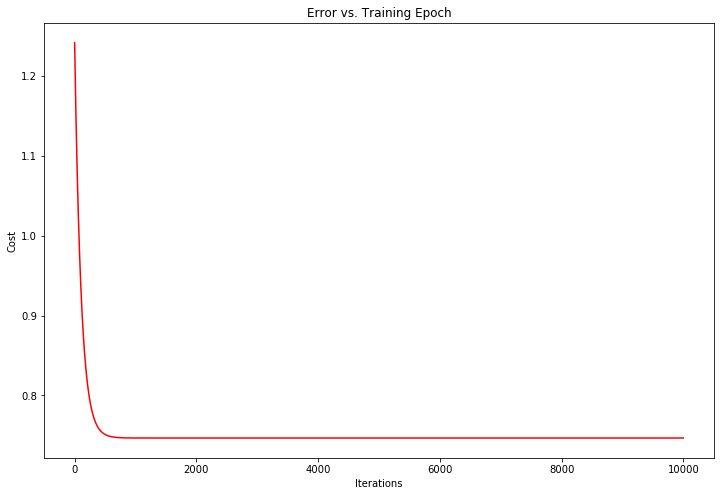

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(10000), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Completed for multiple variables as well.